In [1]:
import numpy as np                           #Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

Reading CSV File

In [2]:
df = pd.read_csv('Superstore.csv',encoding='ISO-8859-1',low_memory=False)

In [3]:
df.head()                                  #Getting a general idea about the dataset

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [4]:
(rows,columns) = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 9994
Number of columns: 21


In [5]:
df.info()                            #Infromation about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
def colDetails():
  '''User defined function for showing value counts of each column'''
  for i in df.columns:
      x = df[i].value_counts()
      print("Column name is:",i,"and its values are:\n",x)
colDetails()

Column name is: Row ID and its values are:
 1       1
6666    1
6659    1
6660    1
6661    1
       ..
3333    1
3334    1
3335    1
3336    1
9994    1
Name: Row ID, Length: 9994, dtype: int64
Column name is: Order ID and its values are:
 CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64
Column name is: Order Date and its values are:
 9/5/2016      38
9/2/2017      36
11/10/2016    35
12/1/2017     34
12/2/2017     34
              ..
2/25/2016      1
10/25/2016     1
2/21/2014      1
10/18/2016     1
1/21/2014      1
Name: Order Date, Length: 1237, dtype: int64
Column name is: Ship Date and its values are:
 12/16/2015    35
9/26/2017     34
12/6/2017     32
11/21/2017    32
9/6/2017      30
              ..
3/4/2014       1
2/11/2017      1
8/7/2016       1
4/8/2

## Data preprocessing

Checking for NULL values

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

No NULL values in the dataset

Checking for duplicate tuples

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]

As the 'Row ID' is unique for each row maybe this is preventing from detecting duplicate rows.Let us drop the 'Row ID' column.

In [9]:
df.drop(['Row ID'],axis=1,inplace=True)

In [10]:
df[df.duplicated(keep=False)]

Order ID Order Date  Ship Date       Ship Mode Customer ID  \
3405  US-2014-150119  4/23/2014  4/27/2014  Standard Class    LB-16795   
3406  US-2014-150119  4/23/2014  4/27/2014  Standard Class    LB-16795   

       Customer Name      Segment        Country      City State  Postal Code  \
3405  Laurel Beltran  Home Office  United States  Columbus  Ohio        43229   
3406  Laurel Beltran  Home Office  United States  Columbus  Ohio        43229   

     Region       Product ID   Category Sub-Category  \
3405   East  FUR-CH-10002965  Furniture       Chairs   
3406   East  FUR-CH-10002965  Furniture       Chairs   

                                           Product Name    Sales  Quantity  \
3405  Global Leather Highback Executive Chair with P...  281.372         2   
3406  Global Leather Highback Executive Chair with P...  281.372         2   

      Discount   Profit  
3405       0.3 -12.0588  
3406       0.3 -12.0588

After dropping the 'Row ID' column, we see that there are duplicate rows. Let us drop them.

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
(rows,columns) = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 9993
Number of columns: 20


Finding the difference between order date and ship date

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [14]:
df['Diff b/w order and ship date'] = df['Ship Date'] - df['Order Date']

In [15]:
df['Diff b/w order and ship date'].value_counts()

4 days    2773
5 days    2169
2 days    1334
6 days    1203
3 days    1005
7 days     621
0 days     519
1 days     369
Name: Diff b/w order and ship date, dtype: int64

In [16]:
df['Diff b/w order and ship date']=df['Diff b/w order and ship date'].dt.days
#dropping 'days' word from the values

In [17]:
df['Diff b/w order and ship date'].value_counts()

4    2773
5    2169
2    1334
6    1203
3    1005
7     621
0     519
1     369
Name: Diff b/w order and ship date, dtype: int64

Converting 'Order Date' and 'Ship Date' columns to [day,month,year] columns

In [18]:
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Day of Week'] = df['Order Date'].dt.dayofweek

In [19]:
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Day of Week'] = df['Ship Date'].dt.dayofweek

In [20]:
df.drop(['Order Date','Ship Date'],axis=1,inplace=True)

In [21]:
df.info()                         #Infromation about the pre-processed dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order ID                      9993 non-null   object 
 1   Ship Mode                     9993 non-null   object 
 2   Customer ID                   9993 non-null   object 
 3   Customer Name                 9993 non-null   object 
 4   Segment                       9993 non-null   object 
 5   Country                       9993 non-null   object 
 6   City                          9993 non-null   object 
 7   State                         9993 non-null   object 
 8   Postal Code                   9993 non-null   int64  
 9   Region                        9993 non-null   object 
 10  Product ID                    9993 non-null   object 
 11  Category                      9993 non-null   object 
 12  Sub-Category                  9993 non-null   object 
 13  Pro

In [22]:
(rows,columns) = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 9993
Number of columns: 25


In [23]:
p = df[df['Profit']>0]['Profit']
l = df[df['Profit']<0]['Profit']
n = df[df['Profit']==0]['Profit']

In [24]:
profit_array=p.to_numpy()

In [25]:
loss_array=l.to_numpy()

In [26]:
print(max(profit_array))
print(min(profit_array))

8399.976
0.0628


Maximum and minimum profit values are 8399.976 and 0.0628 dollars respectively.

In [27]:
range_of_profit = max(profit_array) - min(profit_array)
print(range_of_profit)

8399.9132


Range of profit is 8399.9132.

In [28]:
print(max(loss_array))
print(min(loss_array))

-0.0895
-6599.978


Highest loss incurred is 6599.978 dollars and least is 0.0895

In [29]:
range_of_loss = max(loss_array) - min(loss_array)
print(range_of_loss)

6599.8885


Range of loss is 6599.8885 dollars

In [30]:
print(p.__len__())
print(l.__len__())
print(n.__len__())

8058
1870
65


8058 records with profit, 
1870 records with loss, 
8058 records with neutral

##**EDA**

### Which category of the product has the highest profit?

In [31]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_category, x='Category',
             y='Profit',
             text='Profit',
             title='Profit Analysis by Category')
fig.update_layout(title_text='Profit Analysis by Category', title_x=0.5)

fig.update_layout(xaxis_title='Category', yaxis_title='Total Profit')

fig.show()

#### Findings:
#### Technology category has the highest profit among all three categories i.e 145.459k

### Which year had the highest net profit?

In [32]:
profit_per_year = df.groupby('Order Year')['Profit'].sum().reset_index()
fig = px.bar(profit_per_year, x='Order Year',
             y='Profit',
             text='Profit',
             title='Net Profit Analysis per Year')
fig.update_layout(title_text='Net Profit Analysis per Year', title_x=0.5)

fig.update_layout(xaxis_title='Order Year', yaxis_title='Net Profit')

fig.show()


#### Findings:
#### In year 2017, the net profit was highest i.e 93.439k.

### Which year had the highest profit in the Office Supplies category of product ?

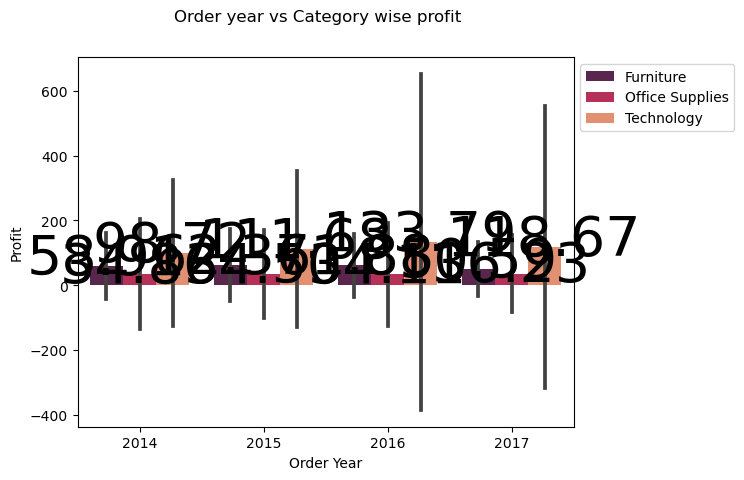

In [33]:
kf=df[df['Profit']>0]
profit_per_year=kf.groupby(['Order Year', 'Category'])['Profit'].sum().reset_index()


ax = sns.barplot(data=kf, x="Order Year", y="Profit", errorbar='sd', estimator=np.mean, hue='Category', palette='rocket')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=40)

plt.suptitle('Order year vs Category wise profit')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Findings:
#### Year 2017 had the highest profit in office supplies category of products.

### Which year had the highest loss in the Technology category of product ?

C:\Users\Asus\AppData\Local\Temp\ipykernel_13664\365239969.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



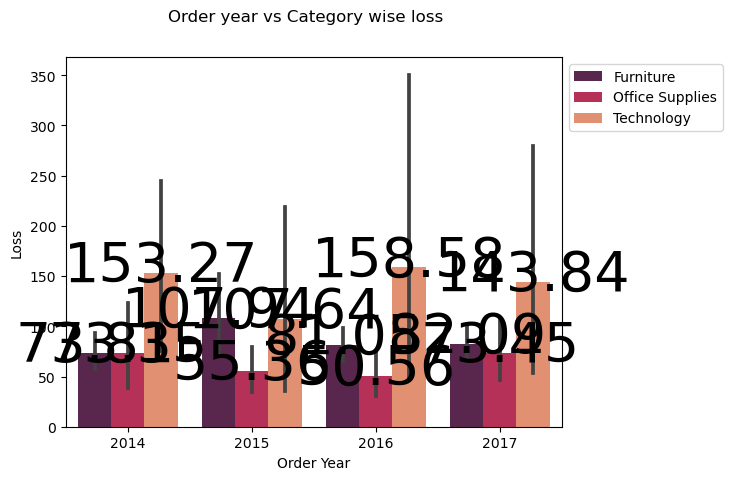

In [34]:
lf=df[df['Profit']<0]
lf['Loss']=lf['Profit']*-1

ax = sns.barplot(data=lf, x="Order Year", y="Loss", hue='Category', palette='rocket')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=40)

plt.suptitle('Order year vs Category wise loss')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Findings:
#### Year 2016 had the highest loss in Technology category of products.

###  What is the distribution of the time difference (in days) between the order date and ship date ship mode wise for the orders in the dataset?

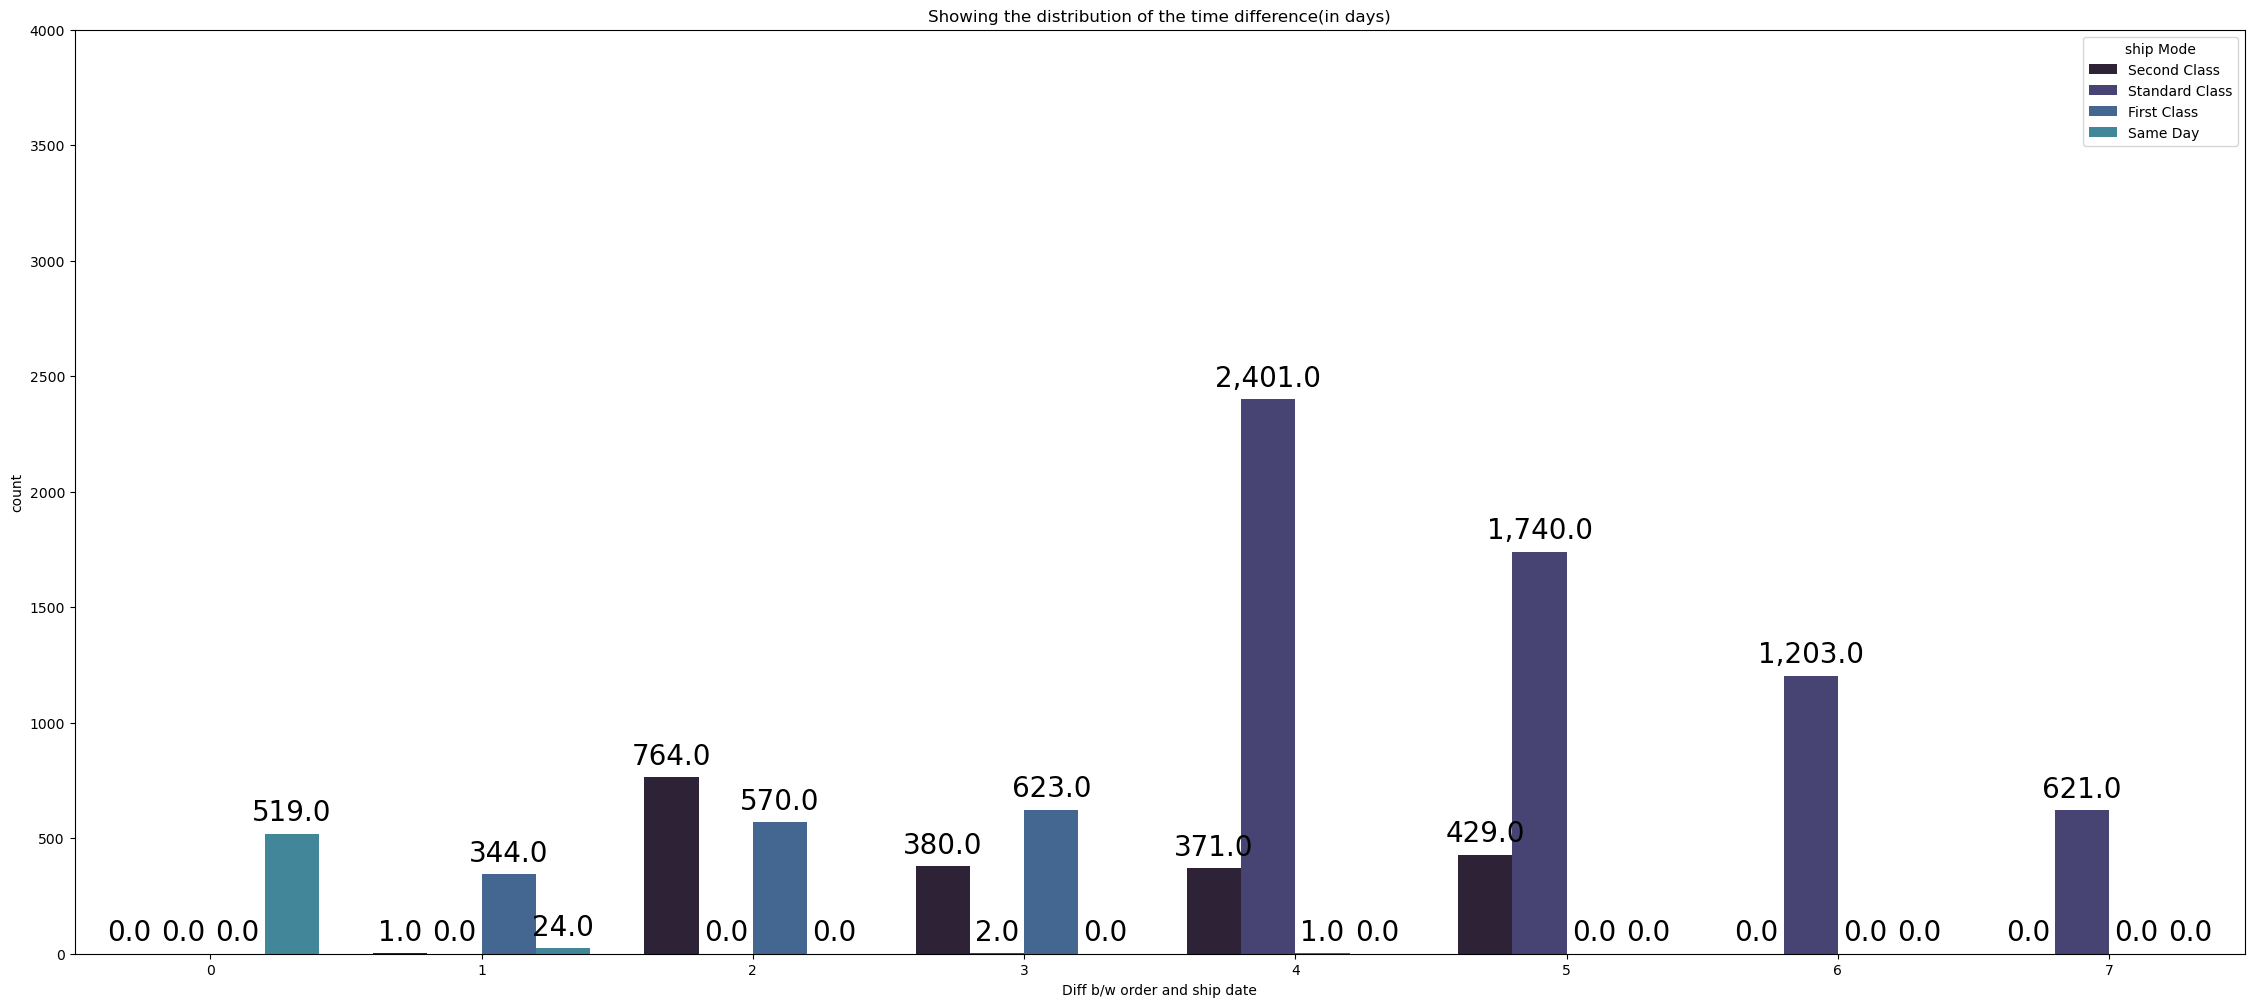

In [35]:
plt.figure(figsize=(28, 12))
sns.set_palette('mako')

ax = sns.countplot(data=df, x='Diff b/w order and ship date', hue='Ship Mode')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ','),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=20)

plt.title('Showing the distribution of the time difference(in days)')
plt.ylim(0, 4000)
plt.legend(title='ship Mode', bbox_to_anchor=(1, 1))
plt.show()

#### This shows that Standard class shipping mode took maximum no. of days for shipment of the products.

### Which mode of shipping was used the most?

In [36]:
import plotly.graph_objects as go
p=df['Ship Mode'].value_counts()
labels =  ["Standard Class","Second Class","First Class","Same Day"]
values = [p[0],p[1],p[2],p[3]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.2, 0])])
fig.update_layout(
    title_text="Different Shipping Modes",title_x=0.5,

annotations=[dict(text='SHIP_MODE', x=0.5, y=0.5, font_size=13, showarrow=False)])
fig.show()

#### Findings:
#### Standard class mode has been used the most  for shipping of products i.e 59.7% of usage.

### Which segment had the highest number of orders?

In [37]:
import plotly.graph_objects as go
v=df['Segment'].value_counts()
labels =  ["Consumer","Corporate","Home Office"]
values = [v[0],v[1],v[2]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,pull=[0, 0, 0.2])])
fig.update_layout(
    title_text="Different Segments from where order have been placed",title_x=0.5,
    annotations=[dict(text='SEGMENT', x=0.5, y=0.5, font_size=13, showarrow=False)])
fig.show()

#### Findings:
#### Consumer segment had the highest number of order i.e 51.9%

### In which year did the consumer segment have the lowest average sales?

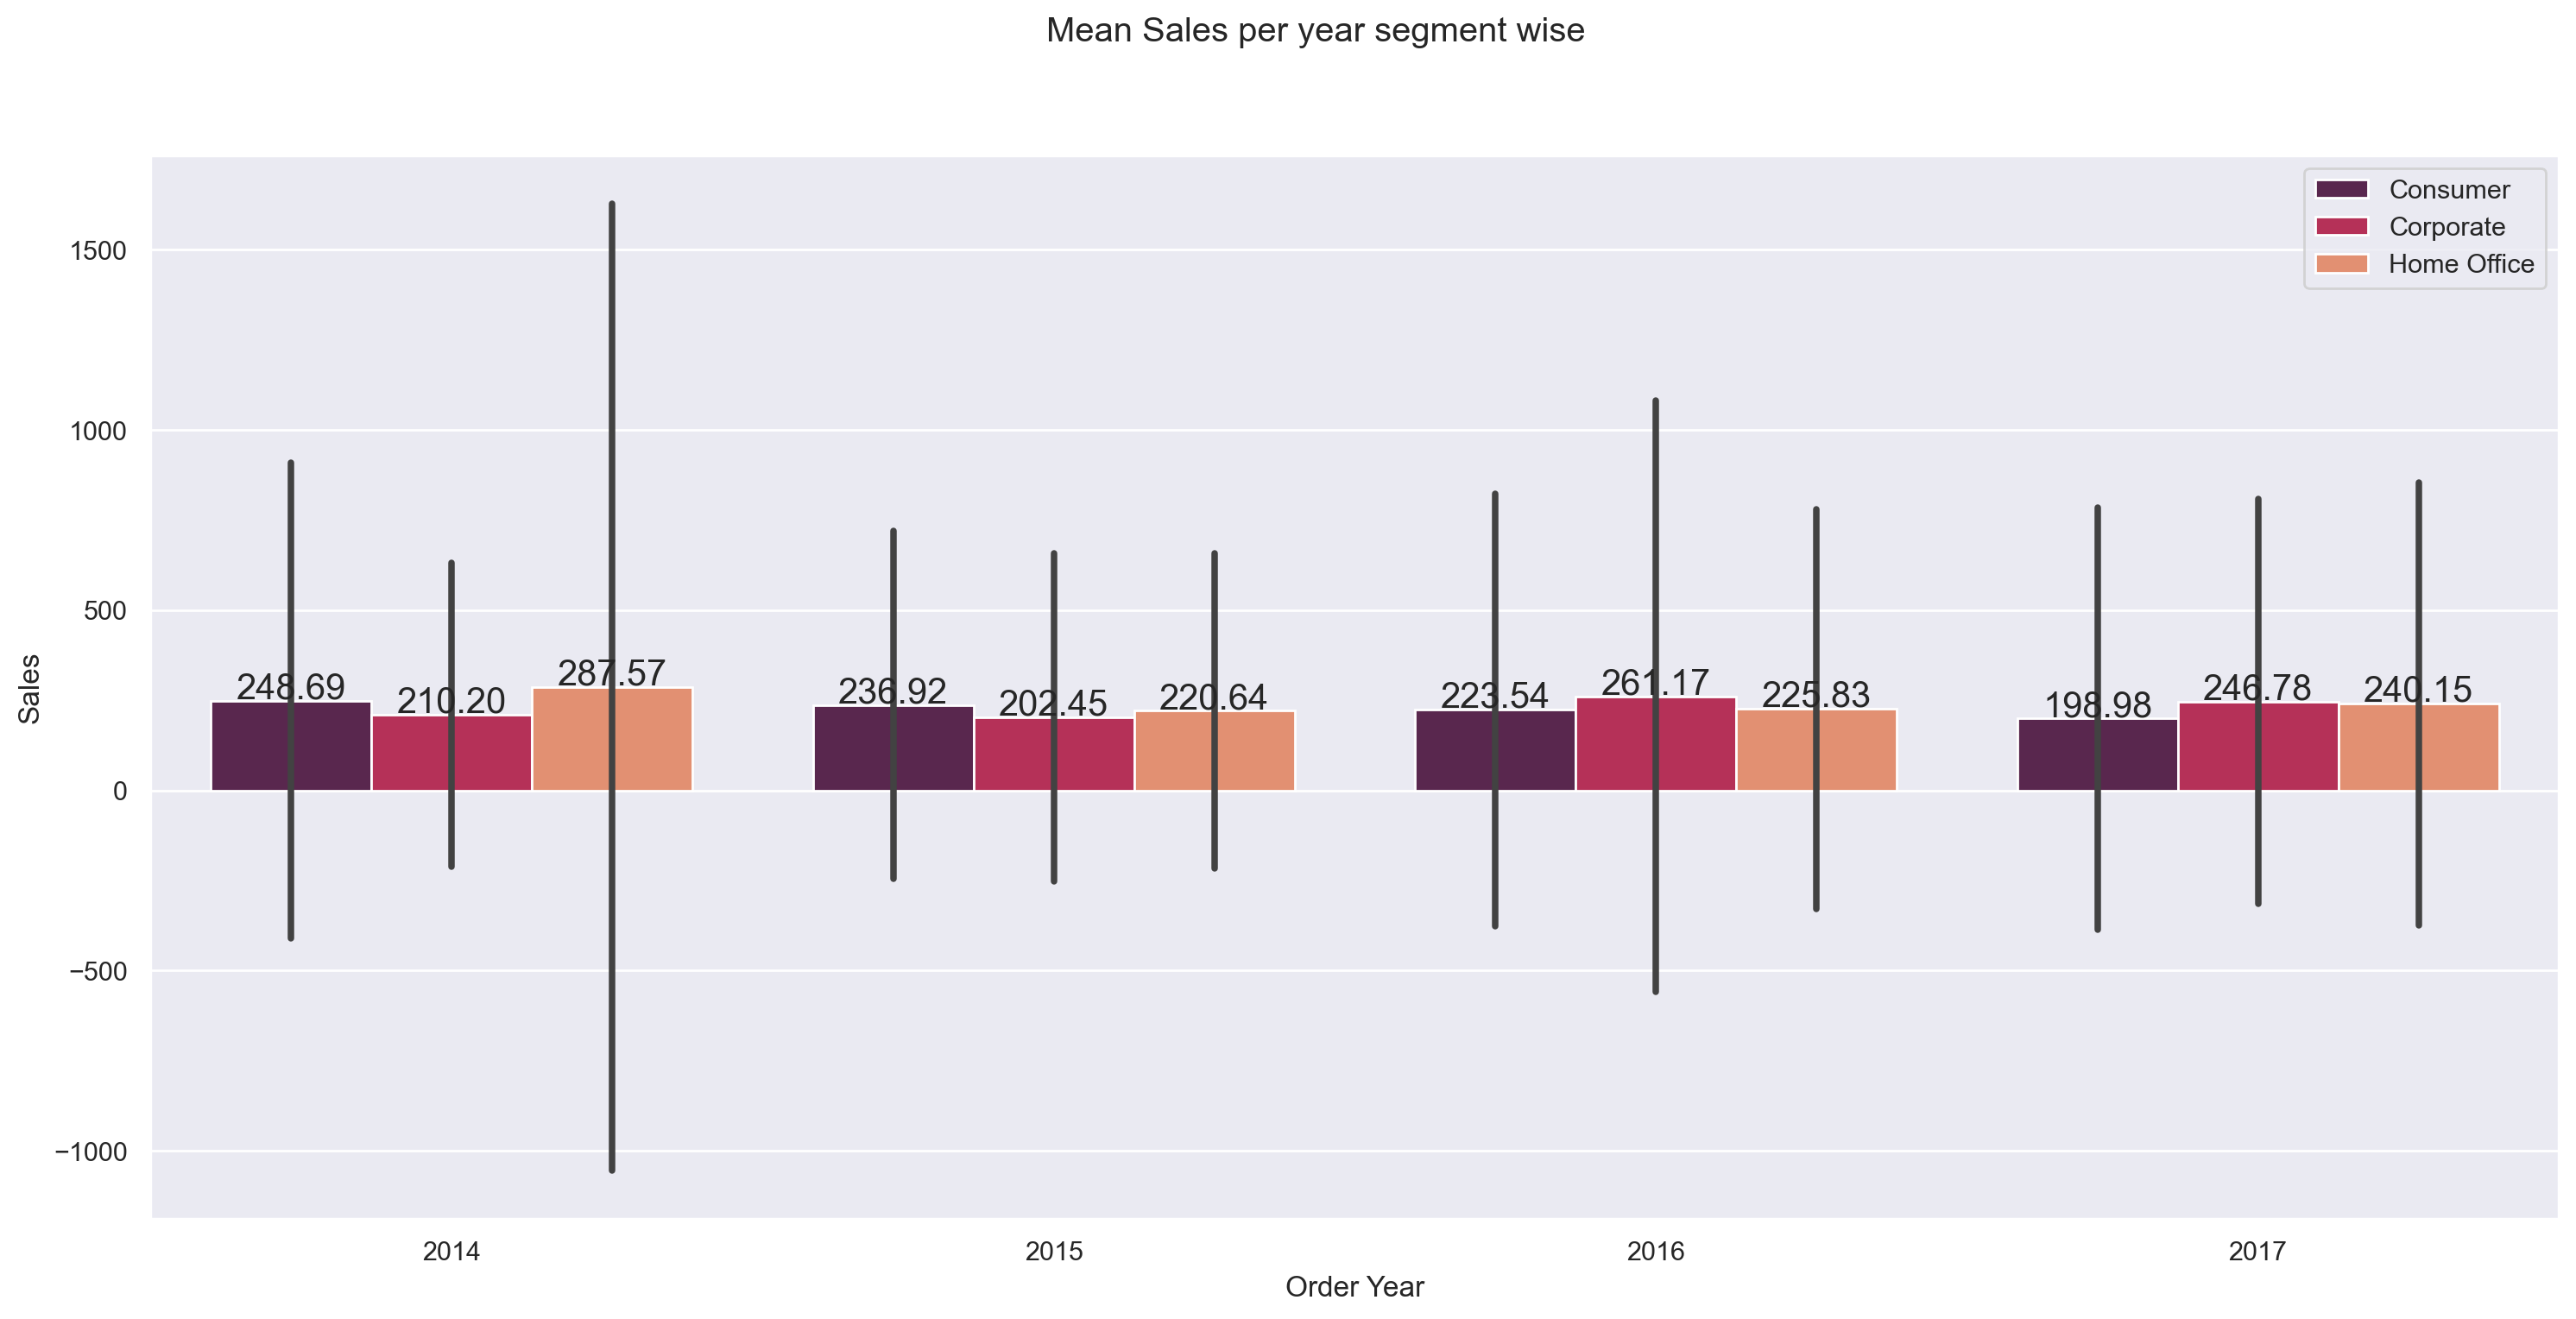

In [38]:
plt.figure(figsize=(18, 8), dpi=200)
sns.set(style='darkgrid')

ax = sns.barplot(x='Order Year', y='Sales', data=df, estimator=np.mean, errorbar='sd', hue='Segment', palette='rocket')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points', fontsize=15)

plt.suptitle('Mean Sales per year segment wise')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


#### Findings:
#### In year 2017, consumer segment have the lowest average sales.

### Which category of product have been ordered least by consumer segment?

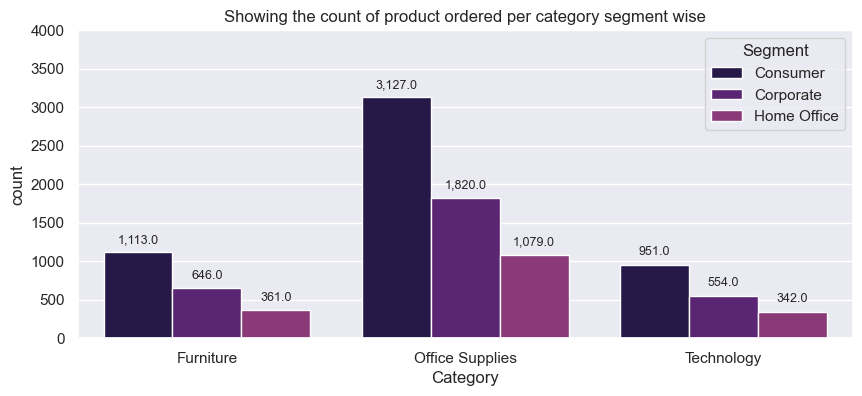

In [39]:
plt.figure(figsize=(10, 4))
sns.set_palette('magma')

ax = sns.countplot(data=df, x='Category', hue='Segment')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ','),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=9)

plt.title('Showing the count of product ordered per category segment wise')
plt.ylim(0, 4000)
plt.legend(title='Segment', bbox_to_anchor=(1, 1))
plt.show()


#### Findings:
#### Technology category of product have been ordered least by the consumer segment.

In [40]:
df.corr()           #Correlation between the columns

C:\Users\Asus\AppData\Local\Temp\ipykernel_13664\836768821.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Postal Code     Sales  Quantity  Discount  \
Postal Code                      1.000000 -0.023851  0.012731  0.058471   
Sales                           -0.023851  1.000000  0.200808 -0.028197   
Quantity                         0.012731  0.200808  1.000000  0.008680   
Discount                         0.058471 -0.028197  0.008680  1.000000   
Profit                          -0.029968  0.479067  0.066241 -0.219481   
Diff b/w order and ship date    -0.009770 -0.007354  0.018301  0.000407   
Order Month                      0.026193 -0.000615  0.023264 -0.004855   
Order Year                       0.004242 -0.009667 -0.005934 -0.002556   
Order Day of Week                0.002248 -0.009339 -0.002145  0.015381   
Ship Month                       0.022007  0.003119  0.027577 -0.007967   
Ship Year                        0.004967 -0.010803 -0.006841 -0.002171   
Ship Day of Week                 0.000447  0.038472  0.022117 -0.012354   

                                Profit  Diff b/w order and ship date  \
Postal Code                  -0.029968                     -0.009770   
Sales                         0.479067                     -0.007354   
Quantity                      0.066241                      0.018301   
Discount                     -0.219481                      0.000407   
Profit                        1.000000                     -0.004649   
Diff b/w order and ship date -0.004649                      1.000000   
Order Month                  -0.000522                      0.000813   
Order Year                    0.004644                     -0.022735   
Order Day of Week             0.000191                     -0.032226   
Ship Month                   -0.000970                     -0.009655   
Ship Year                     0.004505                     -0.016206   
Ship Day of Week              0.021823                      0.059322   

                              Order Month  Order Year  Order Day of Week  \
Postal Code                      0.026193    0.004242           0.002248   
Sales                           -0.000615   -0.009667          -0.009339   
Quantity                         0.023264   -0.005934          -0.002145   
Discount                        -0.004855   -0.002556           0.015381   
Profit                          -0.000522    0.004644           0.000191   
Diff b/w order and ship date     0.000813   -0.022735          -0.032226   
Order Month                      1.000000   -0.020364           0.010805   
Order Year                      -0.020364    1.000000           0.052352   
Order Day of Week                0.010805    0.052352           1.000000   
Ship Month                       0.911871   -0.006333           0.017331   
Ship Year                       -0.003085    0.994082           0.049746   
Ship Day of Week                 0.002143   -0.043889          -0.137413   

                              Ship Month  Ship Year  Ship Day of Week  
Postal Code                     0.022007   0.004967          0.000447  
Sales                           0.003119  -0.010803          0.038472  
Quantity                        0.027577  -0.006841          0.022117  
Discount                       -0.007967  -0.002171         -0.012354  
Profit                         -0.000970   0.004505          0.021823  
Diff b/w order and ship date   -0.009655  -0.016206          0.059322  
Order Month                     0.911871  -0.003085          0.002143  
Order Year                     -0.006333   0.994082         -0.043889  
Order Day of Week               0.017331   0.049746         -0.137413  
Ship Month                      1.000000  -0.033590          0.011888  
Ship Year                      -0.033590   1.000000         -0.045031  
Ship Day of Week                0.011888  -0.045031          1.000000

### Which attribute is highly dependent on Sales?

C:\Users\Asus\AppData\Local\Temp\ipykernel_13664\524495384.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

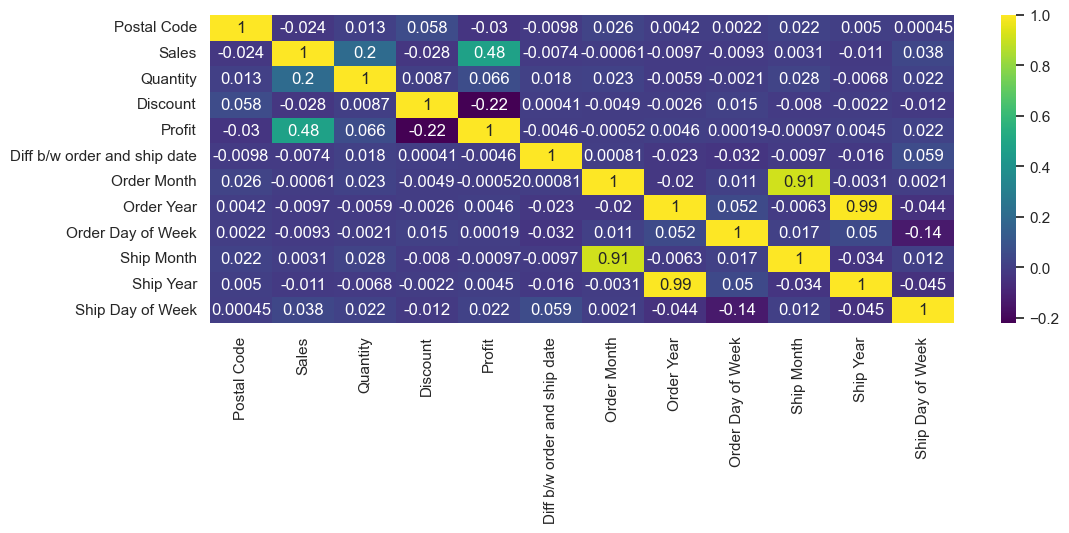

In [41]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),cmap="viridis",annot=True)          #heatmap

#### Findings:
#### Profit is highly dependent on sales i.e 0.48 in correlation table.

### In which category did the corporate segment have the highest average sales?

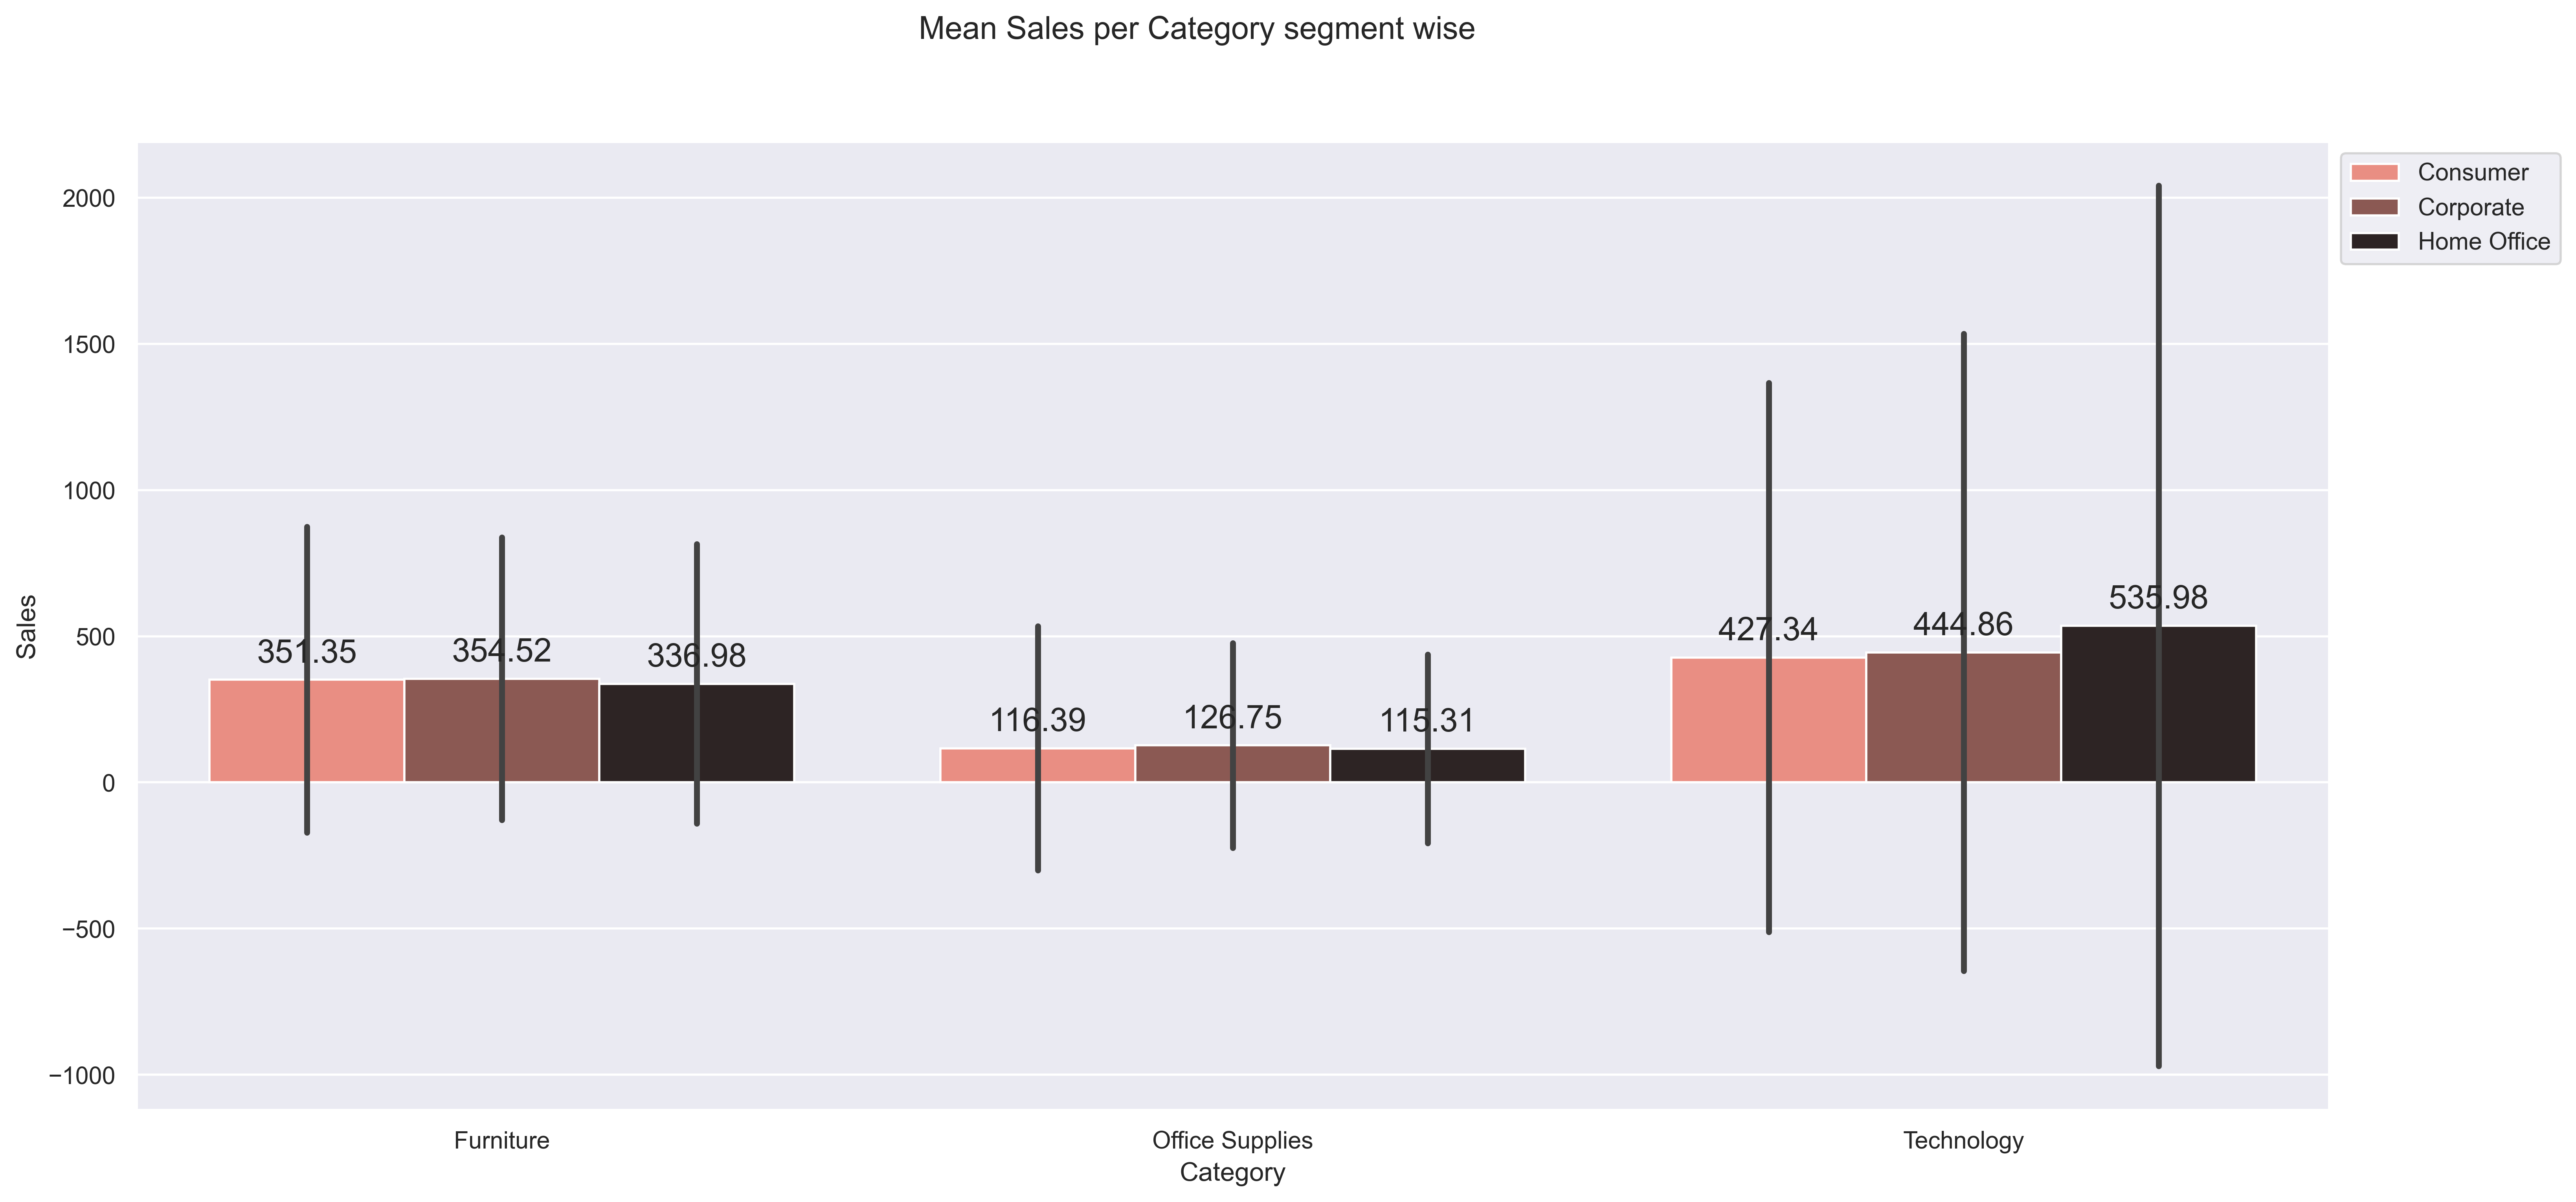

In [42]:
plt.figure(figsize=(18, 8), dpi=400)
sns.set(style='darkgrid')

ax = sns.barplot(x='Category', y='Sales', data=df, estimator=np.mean, errorbar='sd', hue='Segment', palette='dark:salmon_r')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ',.2f'),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=15)

plt.suptitle('Mean Sales per Category segment wise')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Findings:
#### In technology category, corporate segment have the highest average sales.


### In which year did the technology category of product have the lowest average sales?

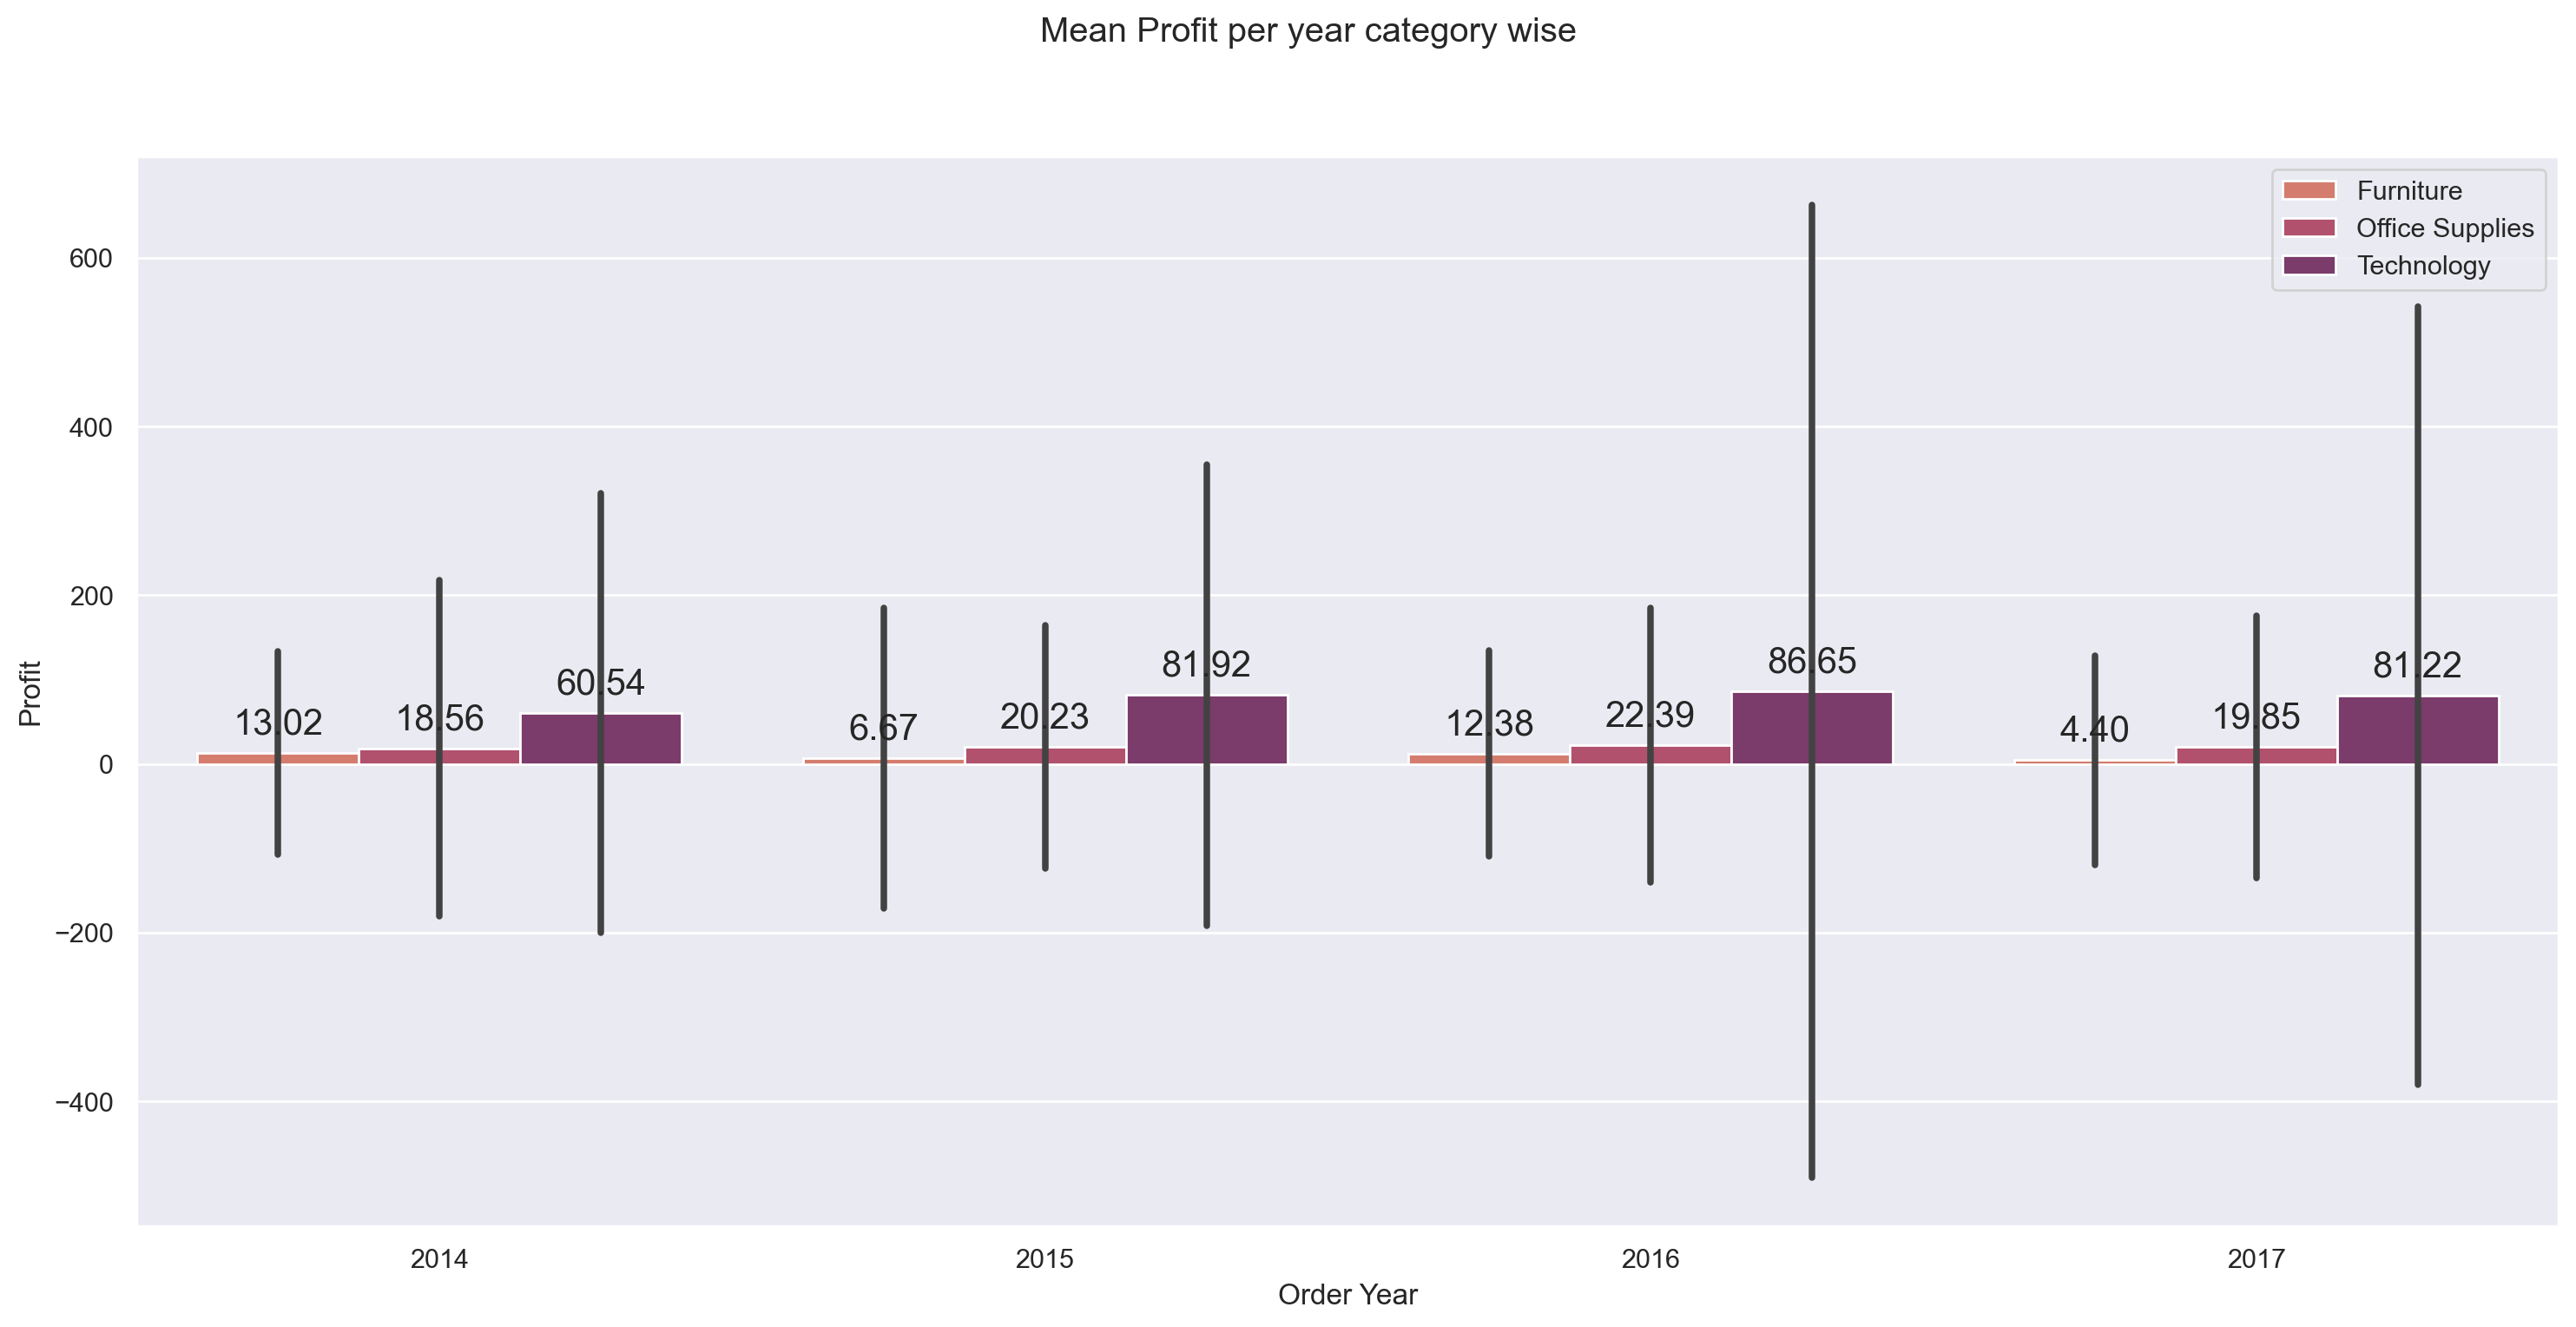

In [43]:
plt.figure(figsize=(18, 8), dpi=200)
sns.set(style='darkgrid')

ax = sns.barplot(x='Order Year', y='Profit', data=df, estimator=np.mean, errorbar='sd', hue='Category', palette='flare')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ',.2f'),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=15)

plt.suptitle('Mean Profit per year category wise')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


#### Findings:
#### In year 2014, the technology category of product have the lowest mean sales.

### Which sub-category of product have been ordered most?

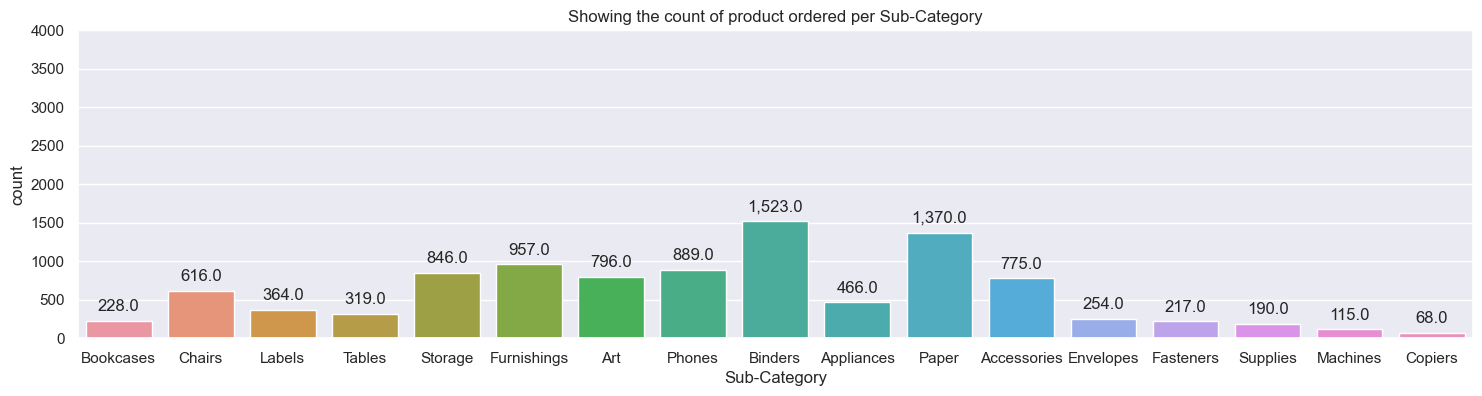

In [44]:
plt.figure(figsize=(18, 4))
sns.set_palette('magma')

ax = sns.countplot(data=df, x='Sub-Category')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ','),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.title('Showing the count of product ordered per Sub-Category')
plt.ylim(0, 4000)
plt.show()

#### Findings:
#### Bindings sub-category of product have been ordered most.

### Which sub-category of product have highest net profit.

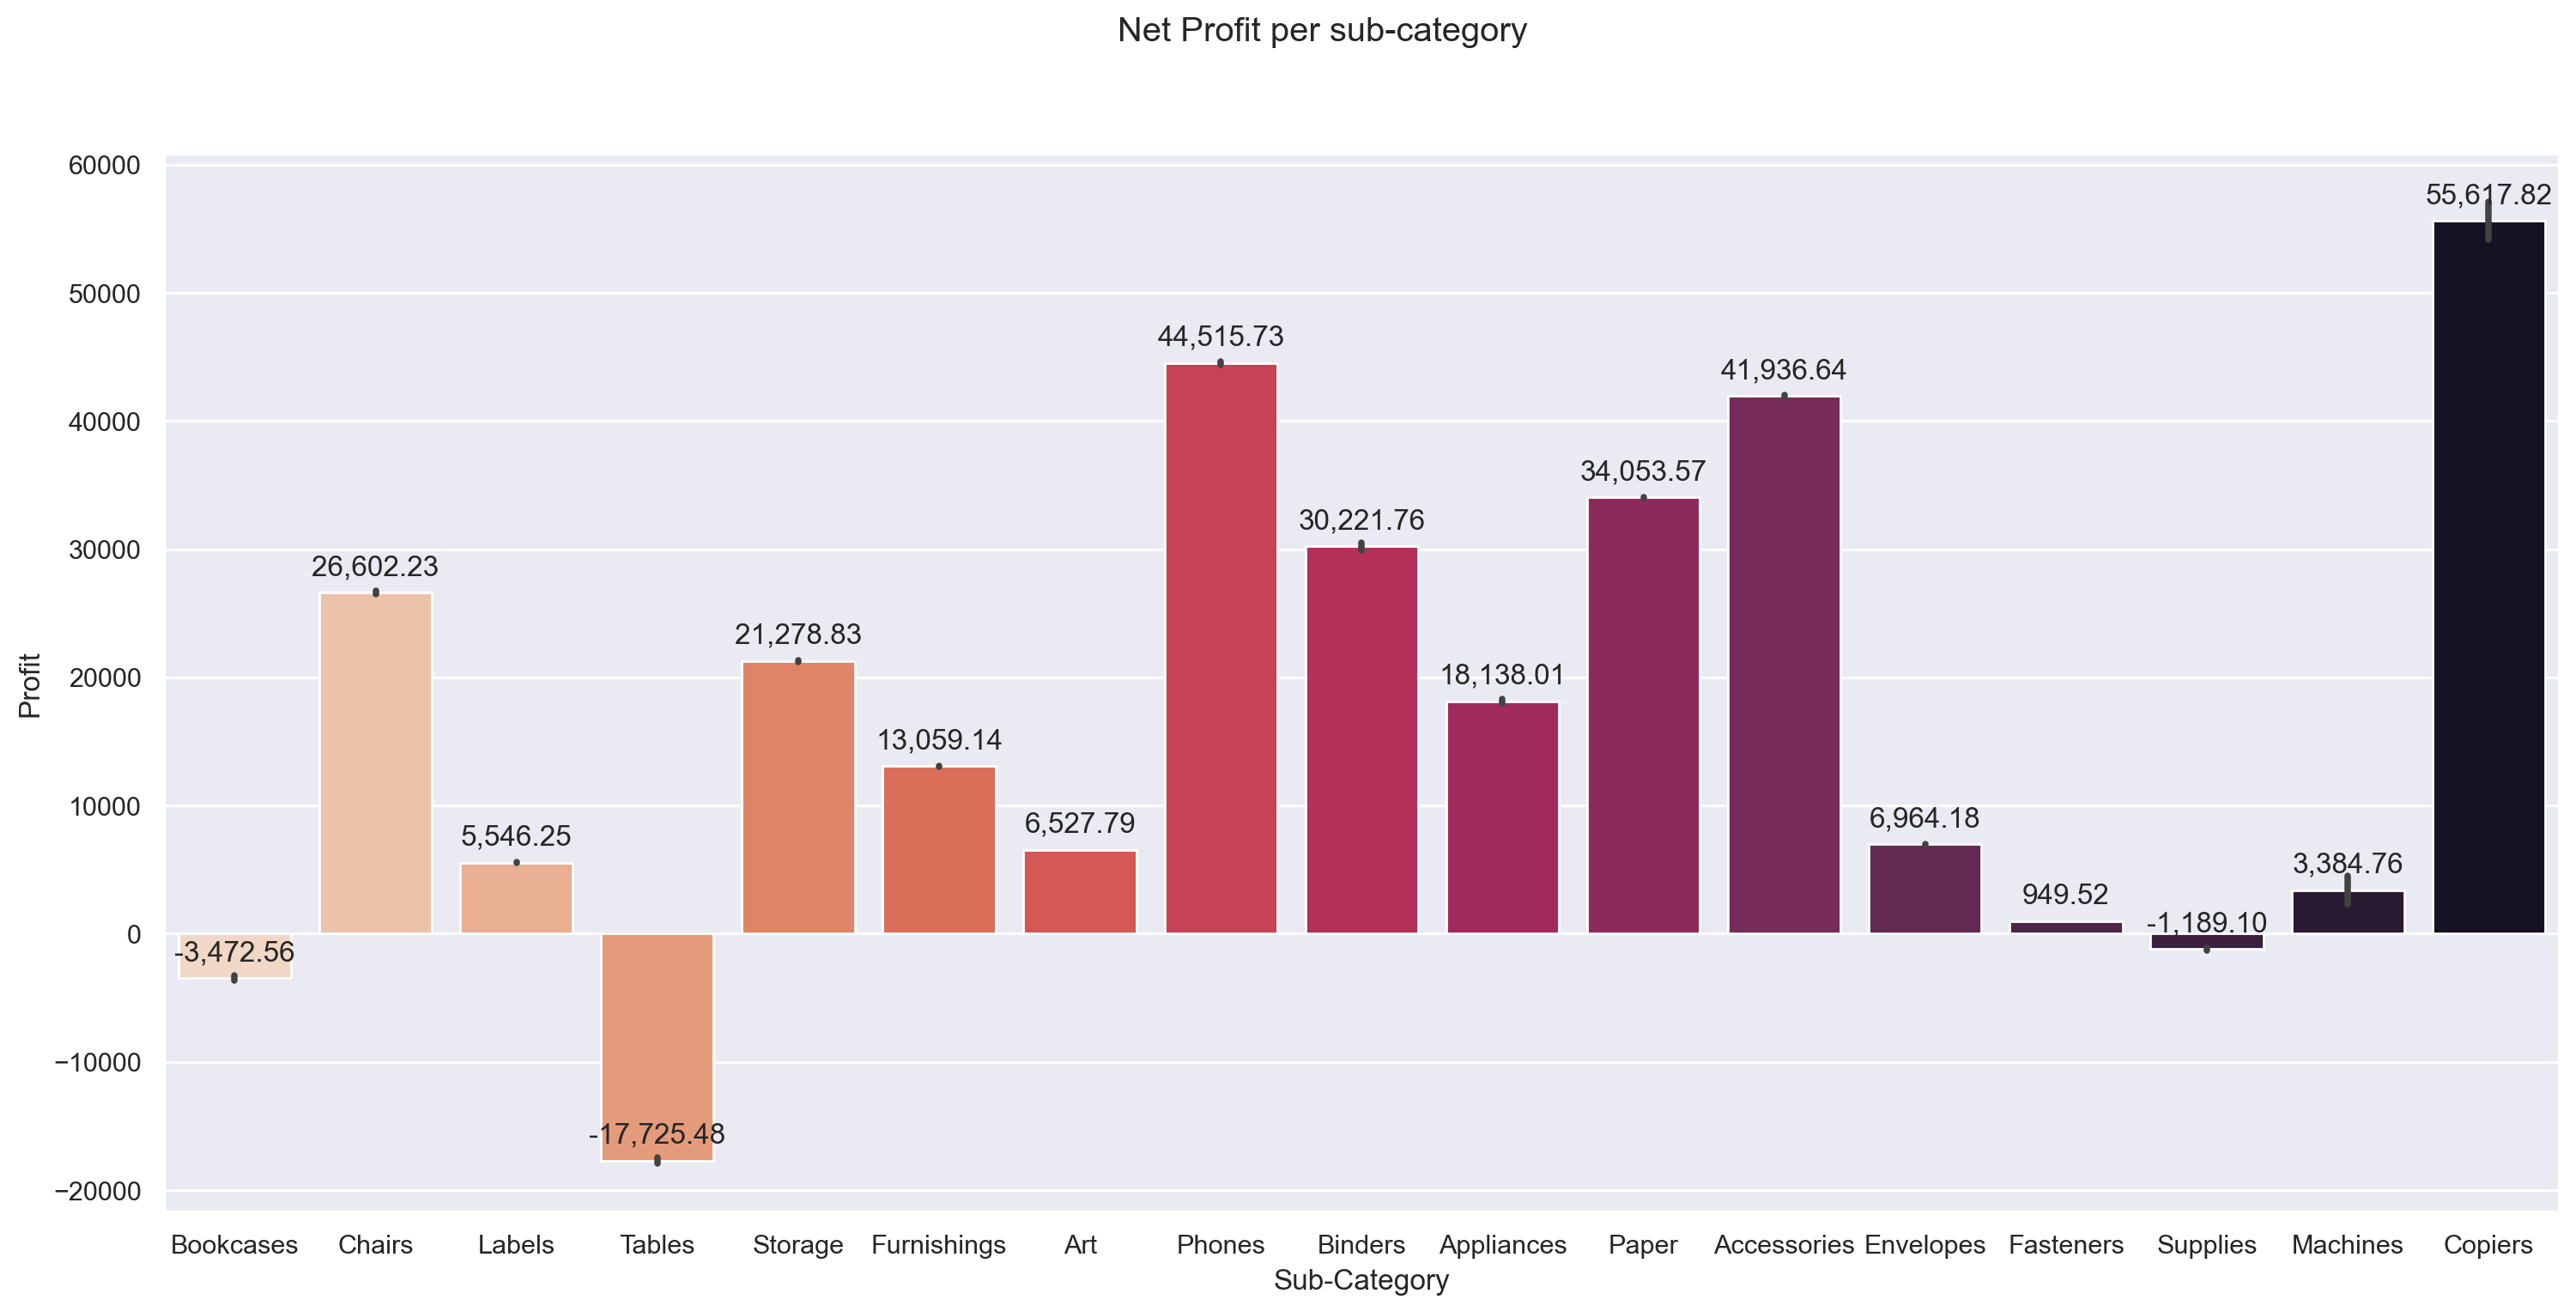

In [45]:
plt.figure(figsize=(18, 8), dpi=200)
sns.set(style='darkgrid')

ax = sns.barplot(x='Sub-Category', y='Profit', data=df, estimator=np.sum, errorbar='sd', palette='rocket_r')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ',.2f'),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=12)

plt.suptitle('Net Profit per sub-category')
plt.show()


#### Findings:
#### Copiers sub-category of product have highest net profit.

### Which category of product have been ordered most in corporate segment?

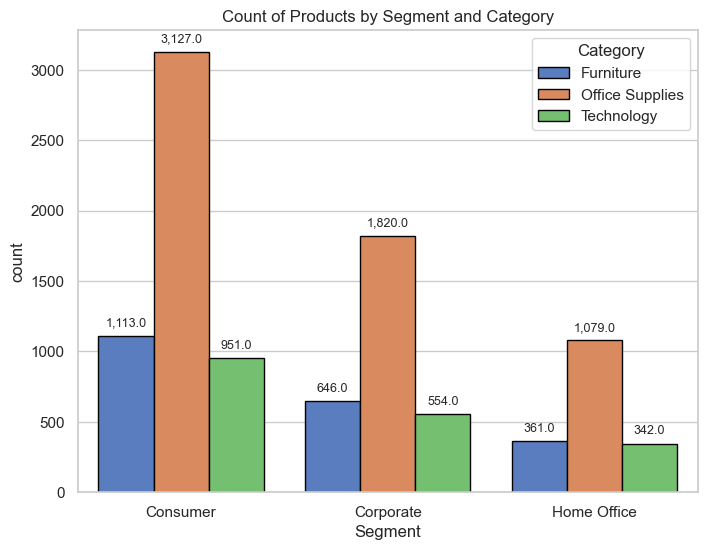

In [46]:
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')

ax = sns.countplot(data=df, x='Segment', hue='Category', palette='muted', edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, ','),
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points', fontsize=9)

plt.title('Count of Products by Segment and Category')
plt.show()

#### Findings:
#### Office supplies category of product have been ordered most in corporate segment.

Text(0.5, 1.0, 'Sales VS Profit')

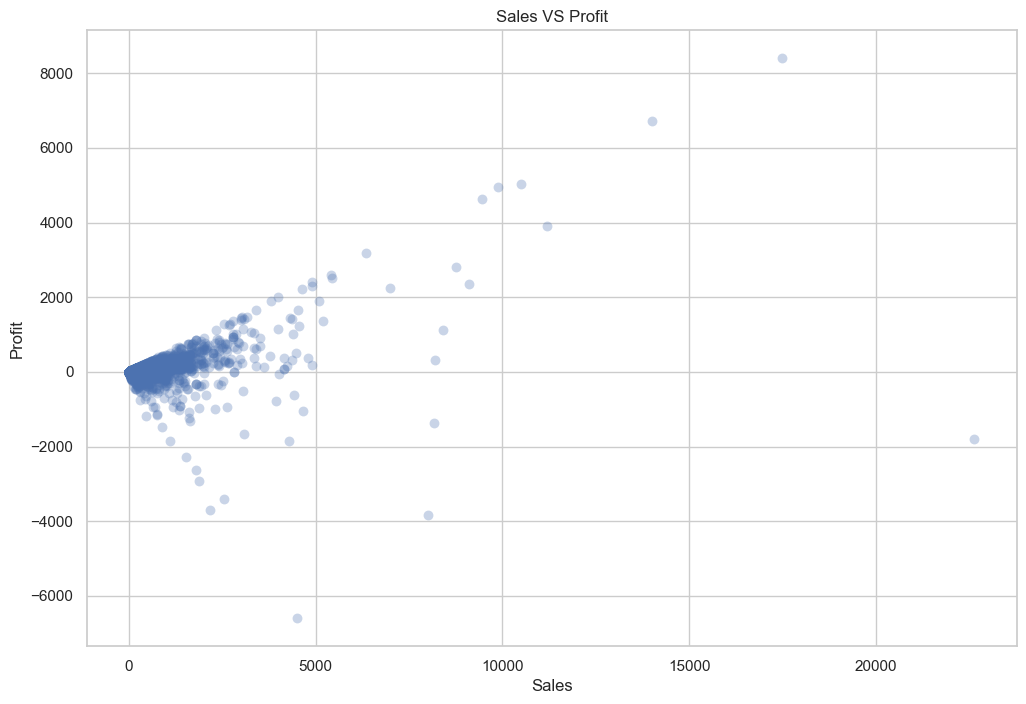

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Sales',y='Profit',data=df,s=50,linewidth=0,alpha=0.3)
plt.title("Sales VS Profit")

### In which category of product profit is more than 6000?

Text(0.5, 1.0, 'Overall Sales VS Profit Category wise')

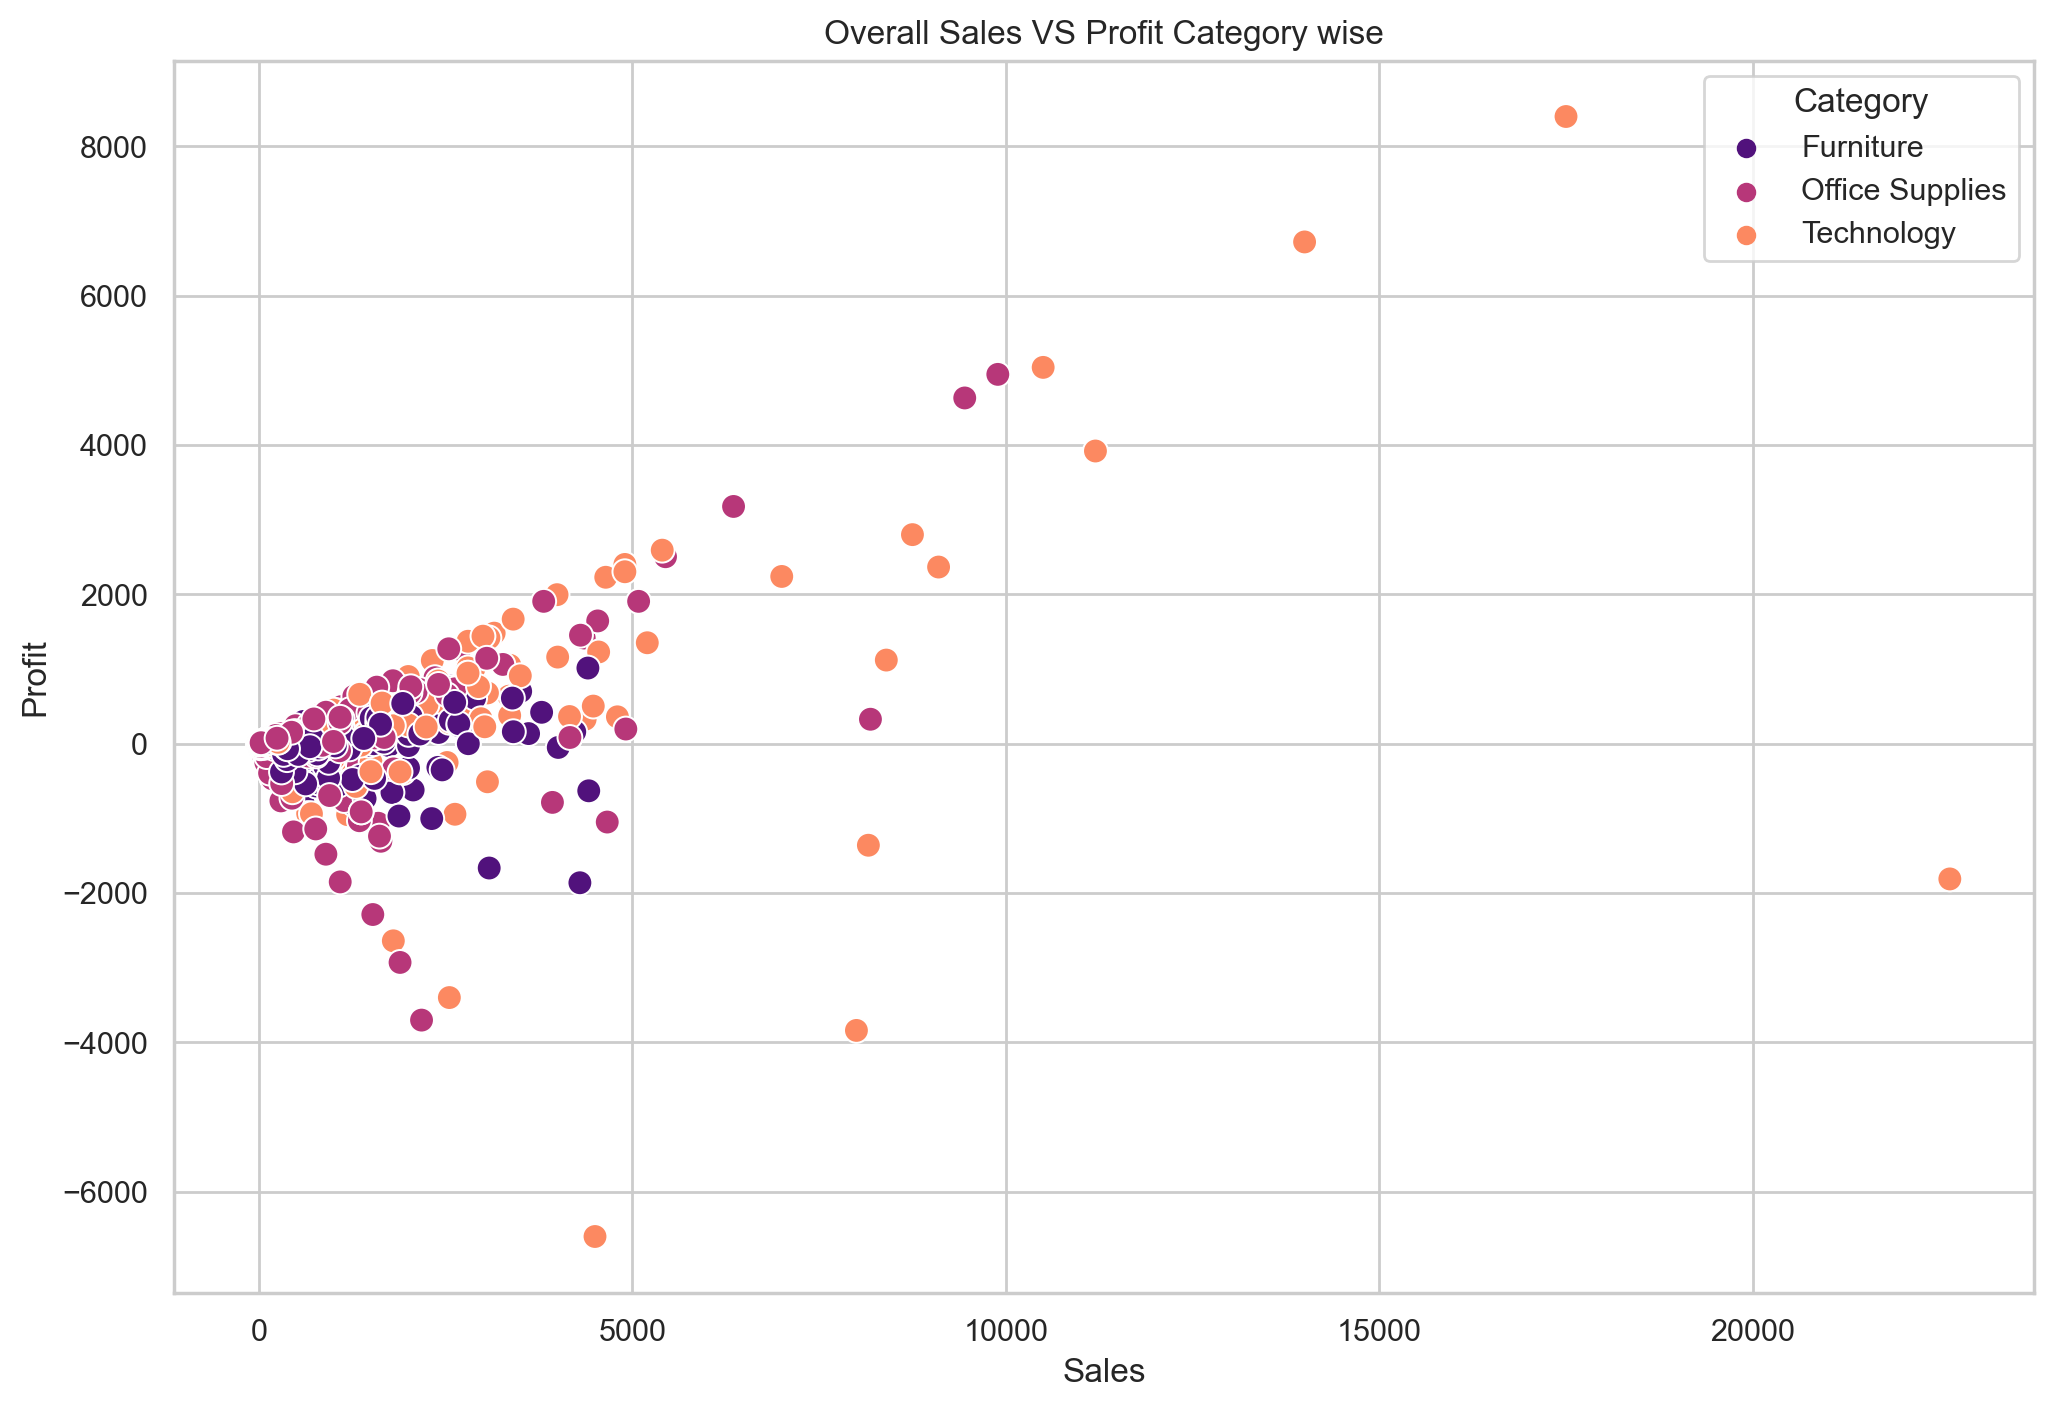

In [48]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Sales',y='Profit',data=df,hue='Category',s=80,palette='magma')
plt.title("Overall Sales VS Profit Category wise")

#### Findings:
#### In technology category profit is more than 6000.

### In which category of product discount offered is least and profit gained is highest?

Text(0.5, 1.0, 'Overall Sales VS Profit Discount wise')

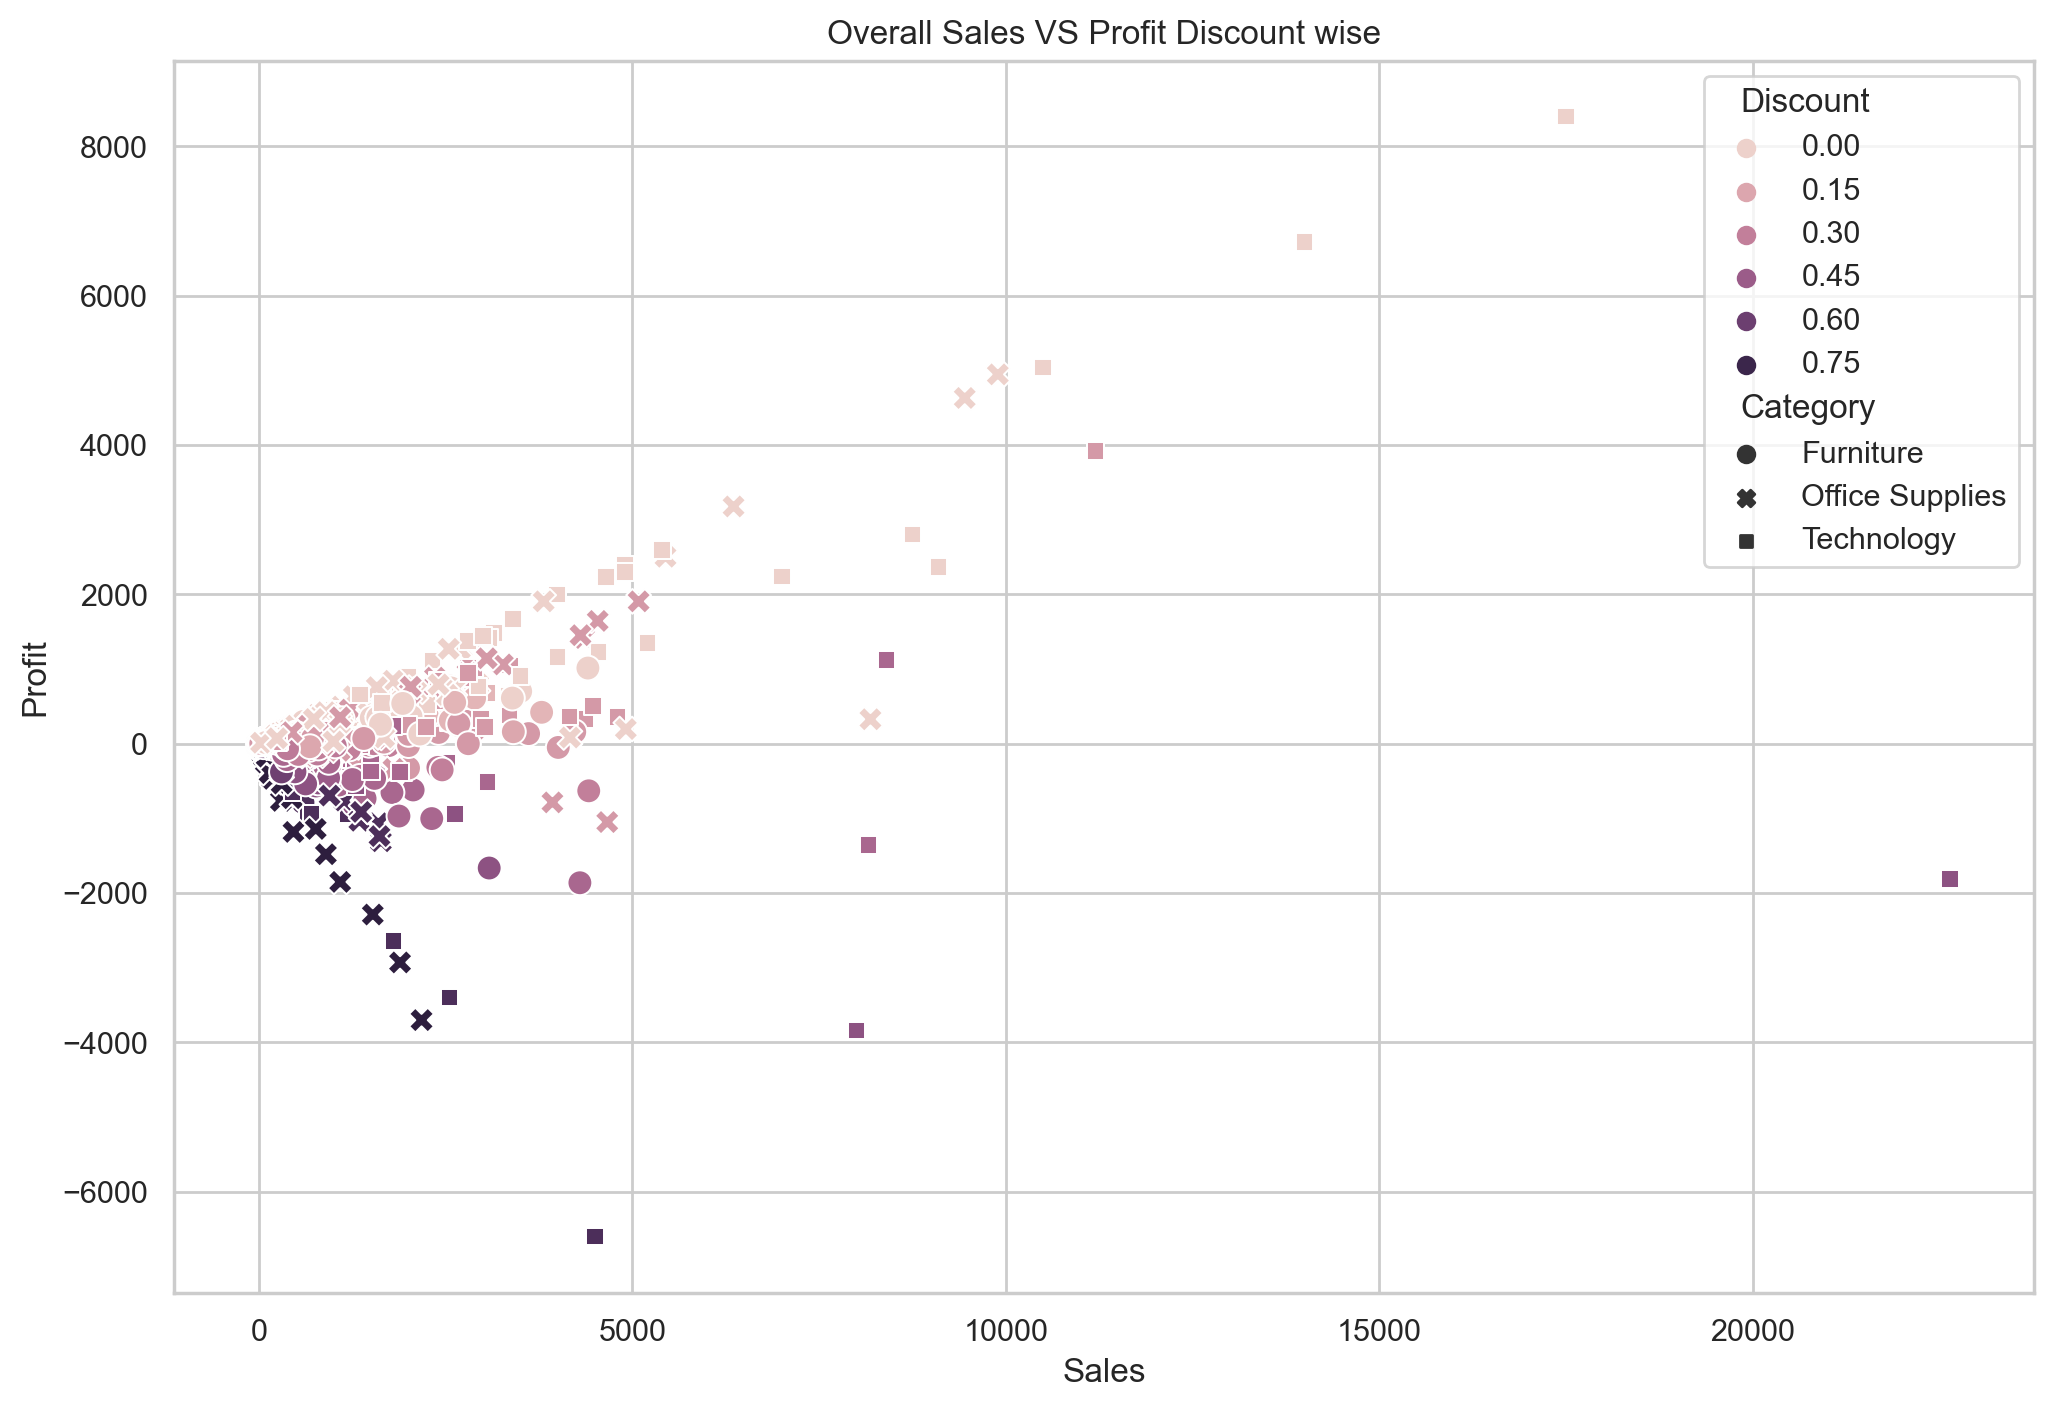

In [49]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Sales',y='Profit',data=df,style='Category',hue='Discount',s=80)
plt.title("Overall Sales VS Profit Discount wise")

#### Findings
#### In technology category, discount offered is least and profit gained is highest.

###  In which month technology category of product have been ordered most?

In [50]:
new_quant=df.groupby(['Order Month','Category'])['Quantity'].sum().reset_index()
fig = px.line(df, x=new_quant['Order Month'], y=new_quant['Quantity'], symbol=new_quant['Category'],color=new_quant['Category'], markers=True,title='Quantity of product sold VS Order Month')
fig.update_traces(textposition="bottom right")
fig.show()

#### Findings:
#### In November, technology category of product have been ordered most

### In which year the amount of office supplies category of product sold is same as the technology category of product sold?

In [51]:
new_quant=df.groupby(['Order Year','Category'])['Quantity'].sum().reset_index()
fig = px.line(df, x=new_quant['Order Year'], y=new_quant['Quantity'],symbol=new_quant['Category'], color=new_quant['Category'], markers=True,title='Quantity of product sold VS Order Year')
fig.update_traces(textposition="bottom right")
fig.show()


#### Findings:
#### In 2017 the amount of office supplies category of product sold is approximately same as the technology category of product sold.

### Which month had the highest sales?

In [52]:
sales_by_month = df.groupby(['Order Month'])['Sales'].sum().reset_index()
fig = px.line(sales_by_month, x='Order Month', y='Sales', title='Monthly Sales Analysis')
fig.show()

#### Findings:
#### In November month, sales was highest.

### Which month had the highest profit?

In [53]:
profit_by_month = df.groupby(['Order Month'])['Profit'].sum().reset_index()
fig = px.line(profit_by_month, x='Order Month', y='Profit', title='Monthly Profit Analysis')
fig.show()

#### Findings:
#### In December month, profit was highest.

### Which customer contributed most towards sales?

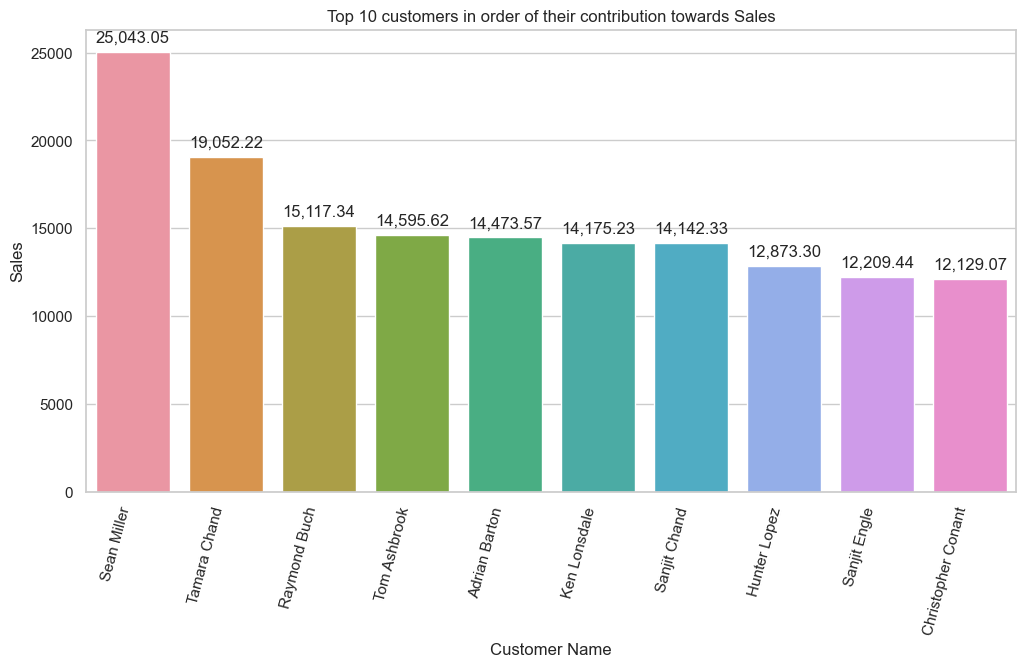

In [54]:
order_by_customer = df.groupby('Customer Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
order_by_customer = order_by_customer.head(10)

plt.figure(figsize=(12, 6))
sns.set_palette('rocket')

chart = sns.barplot(data=order_by_customer, x='Customer Name', y='Sales')

for p in chart.patches:
    height = p.get_height()
    chart.annotate(format(height, ',.2f'),
                   (p.get_x() + p.get_width() / 2, height),
                   ha='center', va='bottom', xytext=(0, 5),
                   textcoords='offset points', fontsize=12)

chart.set_xticklabels(chart.get_xticklabels(), rotation=75, horizontalalignment='right')
chart.set(title='Top 10 customers in order of their contribution towards Sales')
plt.show()

#### Findings:
#### Sean Miller contributed most towards sales.

### Which state contributed most towards sales?

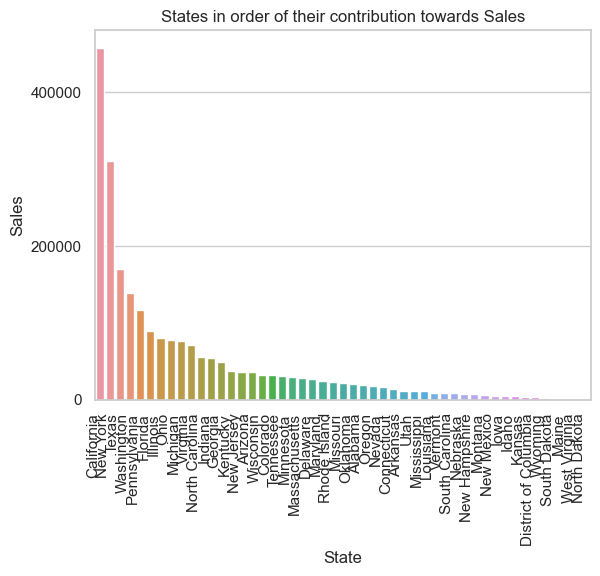

In [55]:
order_by_state = df.groupby('State')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
chart = sns.barplot(data=order_by_state,x='State',y='Sales')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90,horizontalalignment='right')
chart.set(title='States in order of their contribution towards Sales')
width = 50
height = 30
sns.set(rc = {'figure.figsize':(width,height)})
sns.set(font_scale=4)
plt.show()

#### Findings:
#### California contributed most towards sales.

### Which city contributed most towards sales?

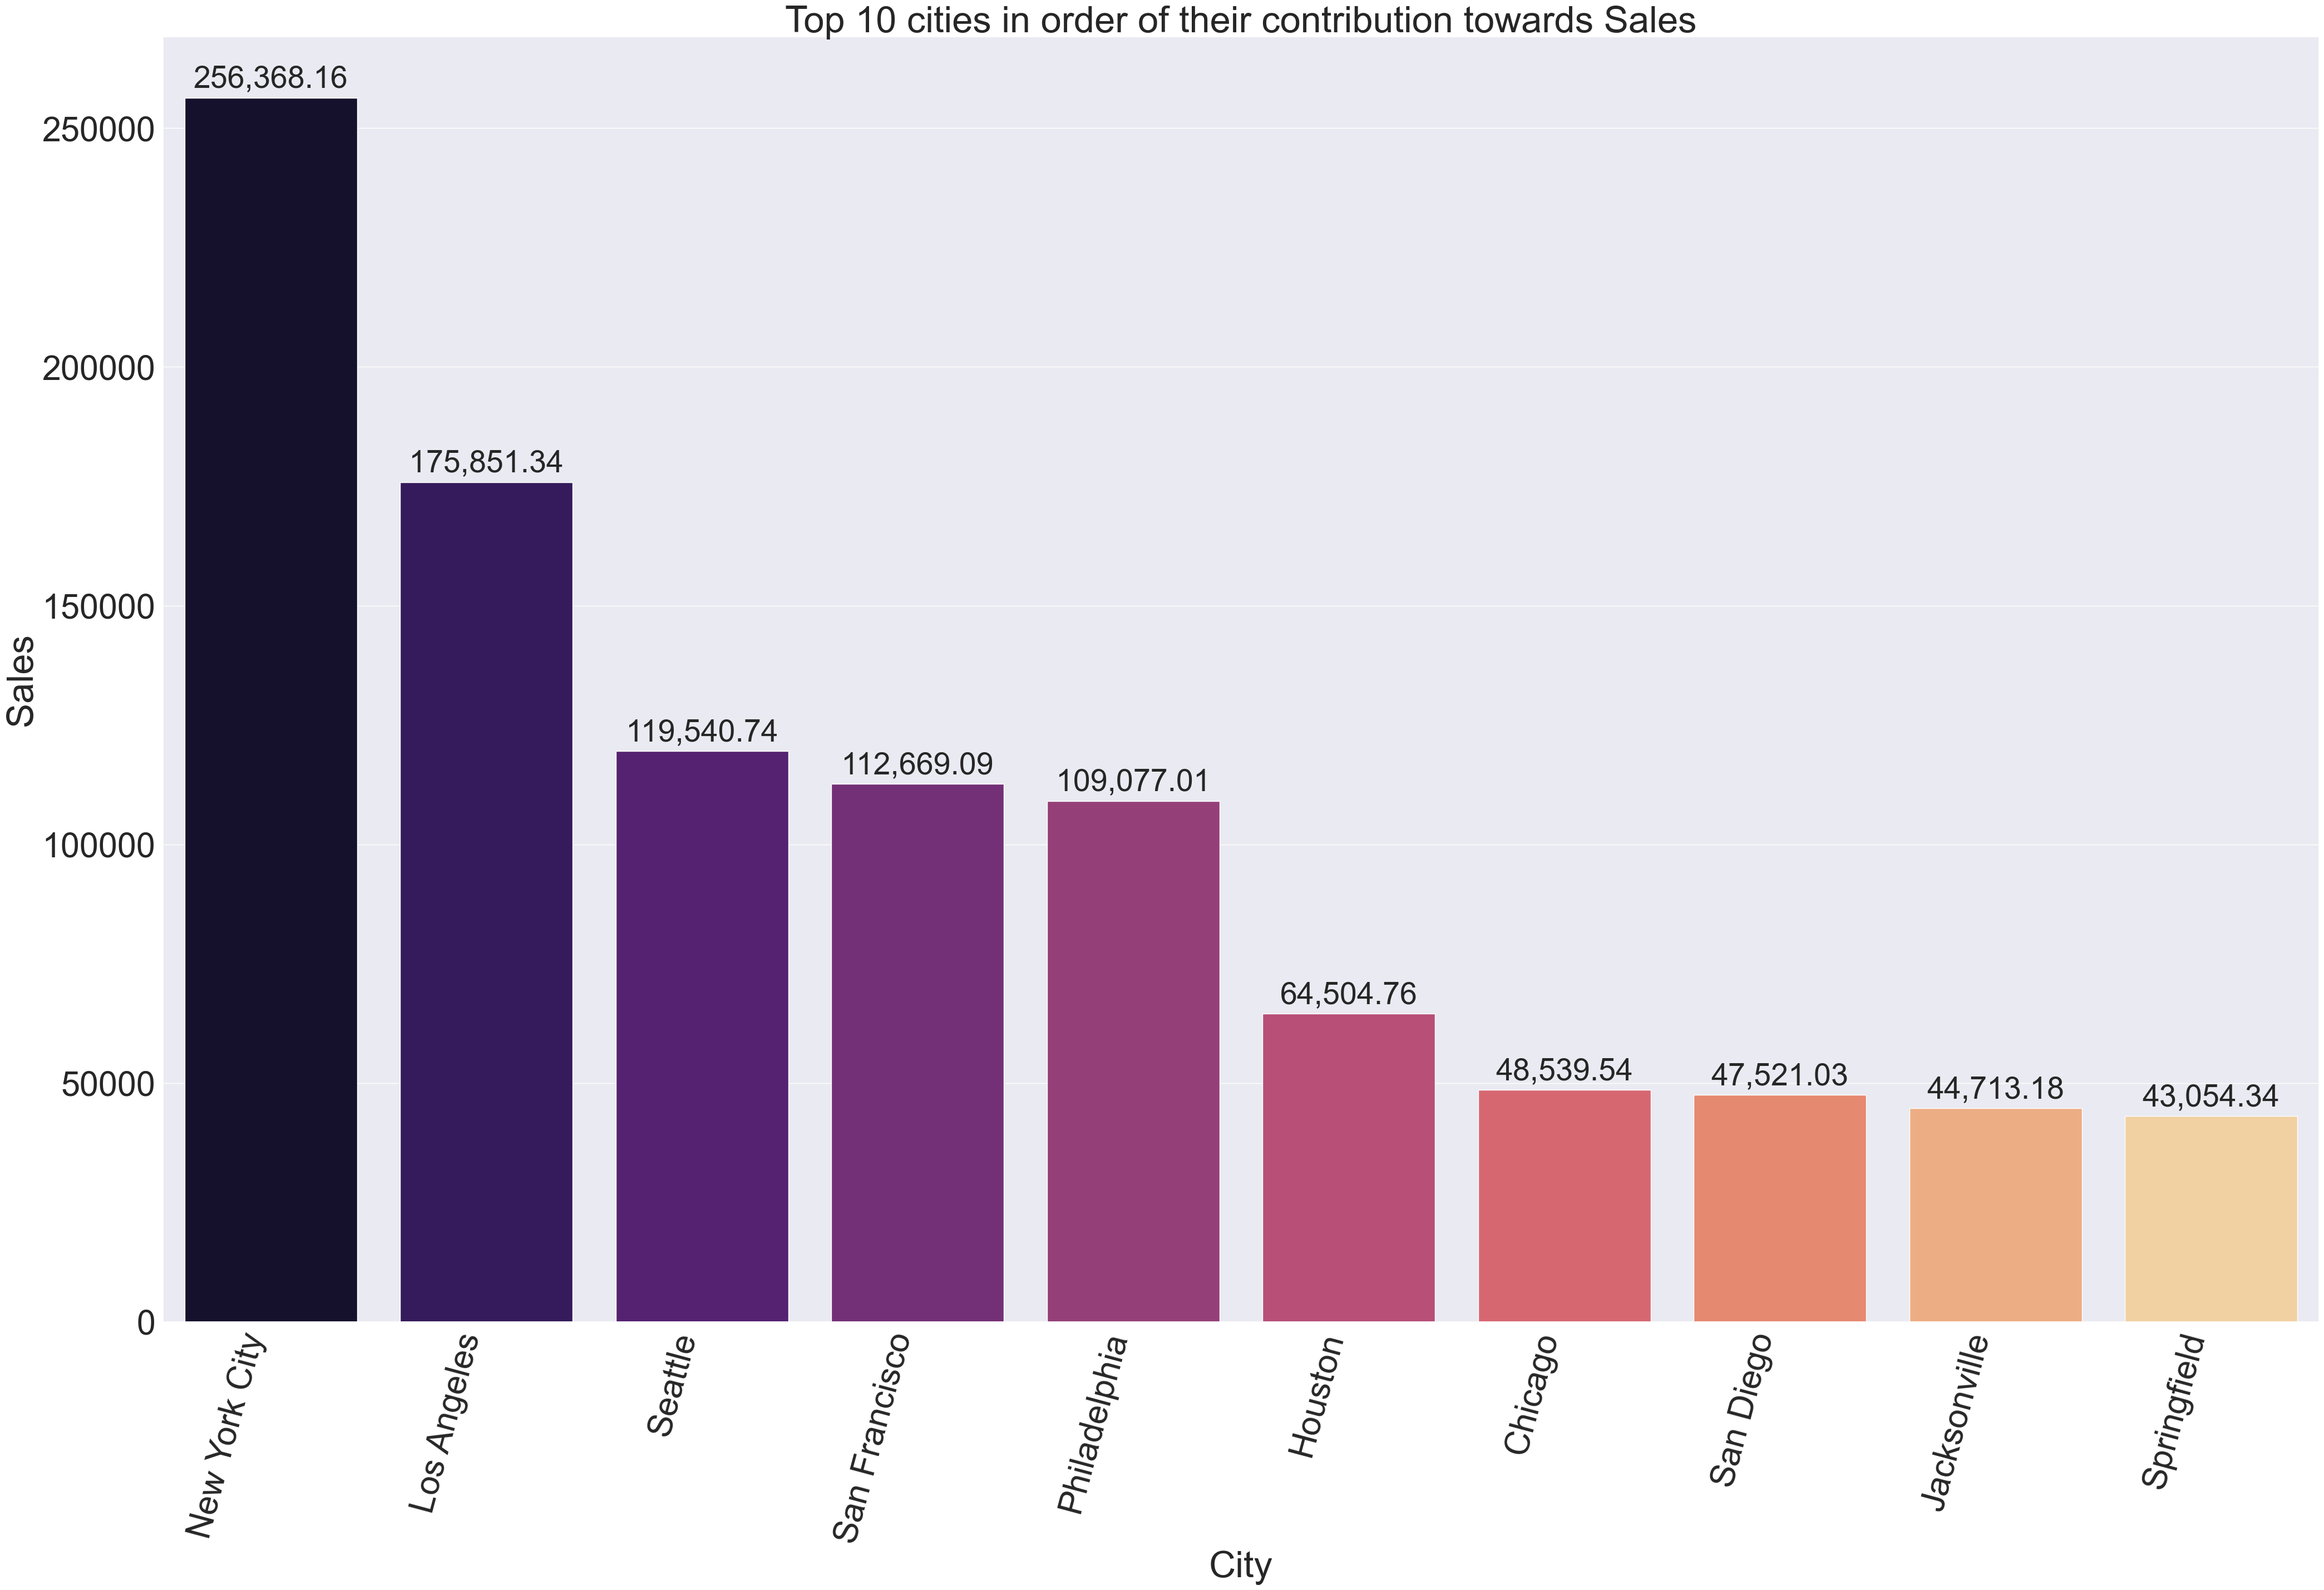

In [56]:
order_by_cities = df.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
order_by_cities= order_by_cities.head(10)
chart = sns.barplot(data=order_by_cities,x='City',y='Sales',palette='magma')

for p in chart.patches:
    height = p.get_height()
    chart.annotate(format(height, ',.2f'),
                   (p.get_x() + p.get_width() / 2, height),
                   ha='center', va='bottom', xytext=(0, 5),
                   textcoords='offset points', fontsize=40)

chart.set_xticklabels(chart.get_xticklabels(), rotation=75,horizontalalignment='right')
chart.set(title='Top 10 cities in order of their contribution towards Sales')
None

#### Findings:
#### New York City contributed most towards sales.

### Which region contributed most towards sales?

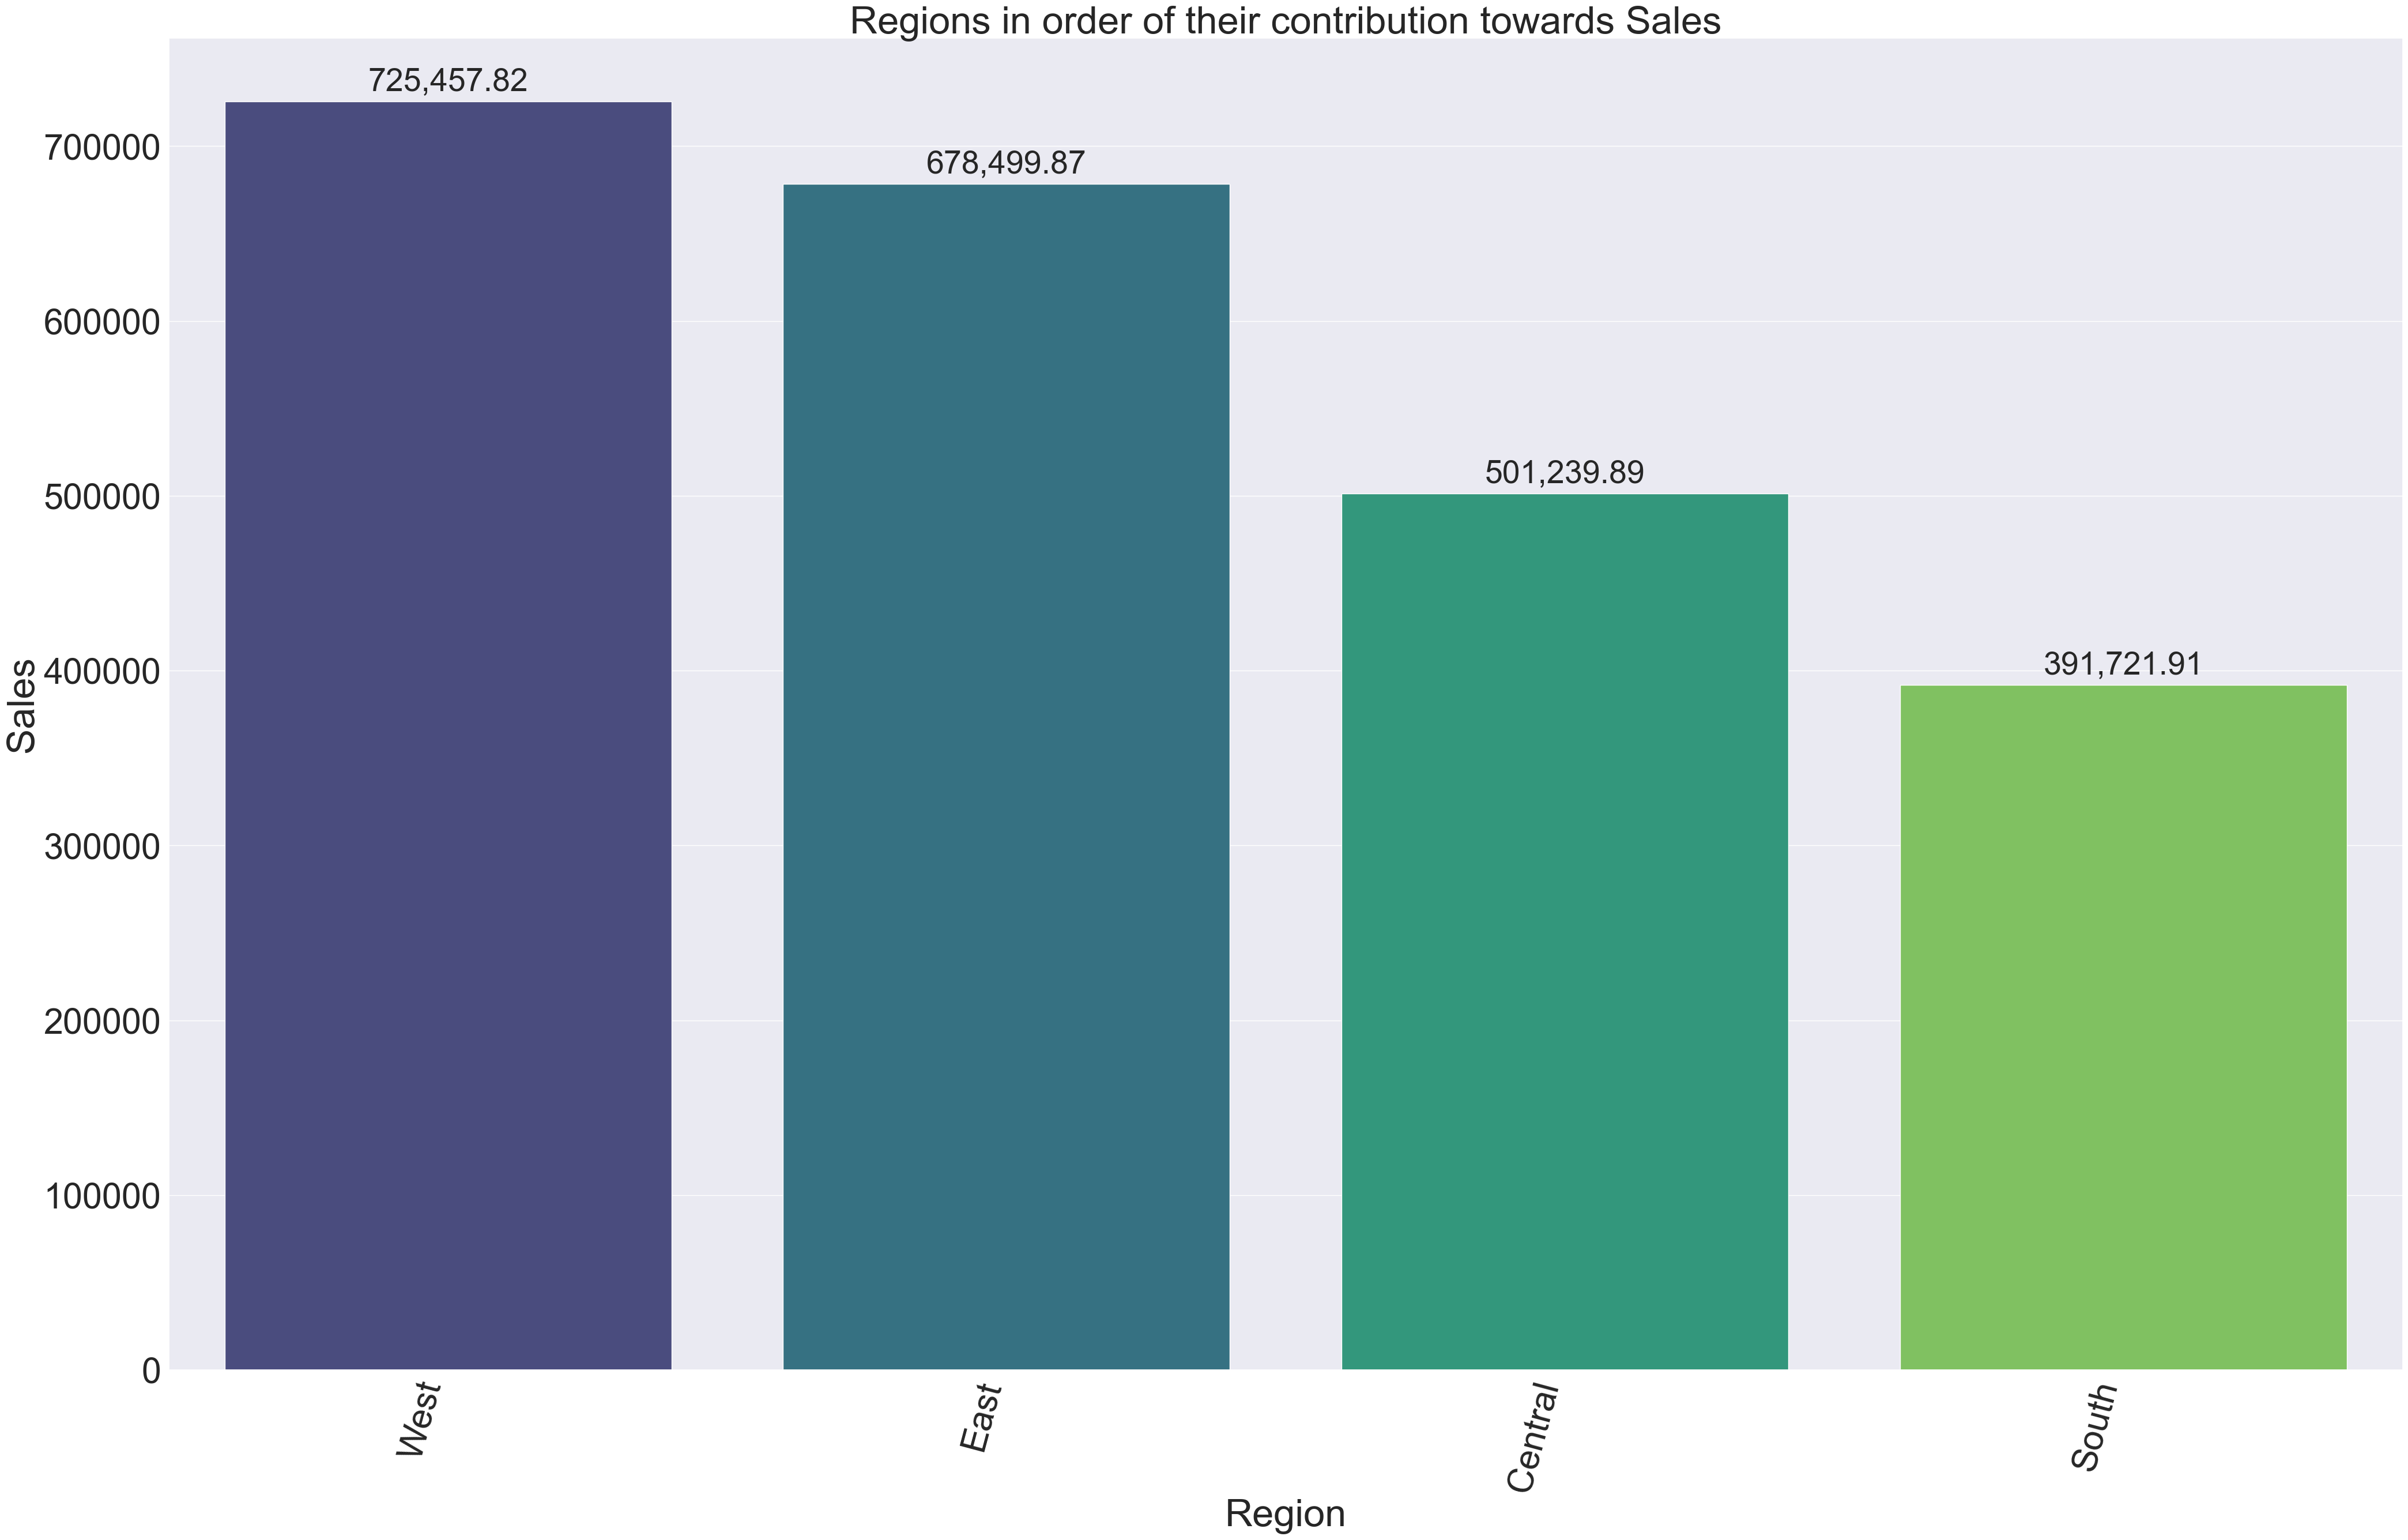

In [57]:
order_by_region = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
chart = sns.barplot(data=order_by_region,x='Region',y='Sales',palette='viridis')

for p in chart.patches:
    height = p.get_height()
    chart.annotate(format(height, ',.2f'),
                   (p.get_x() + p.get_width() / 2, height),
                   ha='center', va='bottom', xytext=(0, 5),
                   textcoords='offset points', fontsize=40)

chart.set_xticklabels(chart.get_xticklabels(), rotation=75,horizontalalignment='right')
chart.set(title='Regions in order of their contribution towards Sales')
None

#### Findings:
#### West region contributed most towards sales.

In [58]:
df

Order ID       Ship Mode Customer ID     Customer Name    Segment  \
0     CA-2016-152156    Second Class    CG-12520       Claire Gute   Consumer   
1     CA-2016-152156    Second Class    CG-12520       Claire Gute   Consumer   
2     CA-2016-138688    Second Class    DV-13045   Darrin Van Huff  Corporate   
3     US-2015-108966  Standard Class    SO-20335    Sean O'Donnell   Consumer   
4     US-2015-108966  Standard Class    SO-20335    Sean O'Donnell   Consumer   
...              ...             ...         ...               ...        ...   
9989  CA-2014-110422    Second Class    TB-21400  Tom Boeckenhauer   Consumer   
9990  CA-2017-121258  Standard Class    DB-13060       Dave Brooks   Consumer   
9991  CA-2017-121258  Standard Class    DB-13060       Dave Brooks   Consumer   
9992  CA-2017-121258  Standard Class    DB-13060       Dave Brooks   Consumer   
9993  CA-2017-119914    Second Class    CC-12220      Chris Cortes   Consumer   

            Country             City       State  Postal Code Region  ...  \
0     United States        Henderson    Kentucky        42420  South  ...   
1     United States        Henderson    Kentucky        42420  South  ...   
2     United States      Los Angeles  California        90036   West  ...   
3     United States  Fort Lauderdale     Florida        33311  South  ...   
4     United States  Fort Lauderdale     Florida        33311  South  ...   
...             ...              ...         ...          ...    ...  ...   
9989  United States            Miami     Florida        33180  South  ...   
9990  United States       Costa Mesa  California        92627   West  ...   
9991  United States       Costa Mesa  California        92627   West  ...   
9992  United States       Costa Mesa  California        92627   West  ...   
9993  United States      Westminster  California        92683   West  ...   

     Quantity Discount    Profit Diff b/w order and ship date  Order Month  \
0           2     0.00   41.9136                            3           11   
1           3     0.00  219.5820                            3           11   
2           2     0.00    6.8714                            4            6   
3           5     0.45 -383.0310                            7           10   
4           2     0.20    2.5164                            7           10   
...       ...      ...       ...                          ...          ...   
9989        3     0.20    4.1028                            2            1   
9990        2     0.00   15.6332                            5            2   
9991        2     0.20   19.3932                            5            2   
9992        4     0.00   13.3200                            5            2   
9993        2     0.00   72.9480                            5            5   

      Order Year  Order Day of Week  Ship Month  Ship Year  Ship Day of Week  
0           2016                  1          11       2016                 4  
1           2016                  1          11       2016                 4  
2           2016                  6           6       2016                 3  
3           2015                  6          10       2015                 6  
4           2015                  6          10       2015                 6  
...          ...                ...         ...        ...               ...  
9989        2014                  1           1       2014                 3  
9990        2017                  6           3       2017                 4  
9991        2017                  6           3       2017                 4  
9992        2017                  6           3       2017                 4  
9993        2017                  3           5       2017                 1  

[9993 rows x 25 columns]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order ID                      9993 non-null   object 
 1   Ship Mode                     9993 non-null   object 
 2   Customer ID                   9993 non-null   object 
 3   Customer Name                 9993 non-null   object 
 4   Segment                       9993 non-null   object 
 5   Country                       9993 non-null   object 
 6   City                          9993 non-null   object 
 7   State                         9993 non-null   object 
 8   Postal Code                   9993 non-null   int64  
 9   Region                        9993 non-null   object 
 10  Product ID                    9993 non-null   object 
 11  Category                      9993 non-null   object 
 12  Sub-Category                  9993 non-null   object 
 13  Pro

##Outlier Removal

In [60]:
new_df = df.copy(deep=True)

In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order ID                      9993 non-null   object 
 1   Ship Mode                     9993 non-null   object 
 2   Customer ID                   9993 non-null   object 
 3   Customer Name                 9993 non-null   object 
 4   Segment                       9993 non-null   object 
 5   Country                       9993 non-null   object 
 6   City                          9993 non-null   object 
 7   State                         9993 non-null   object 
 8   Postal Code                   9993 non-null   int64  
 9   Region                        9993 non-null   object 
 10  Product ID                    9993 non-null   object 
 11  Category                      9993 non-null   object 
 12  Sub-Category                  9993 non-null   object 
 13  Pro

In [62]:
new_df.drop(['Order ID', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Product Name', 'Order Month', 'Order Year', 'Order Day of Week', 'Ship Month', 'Ship Year', 'Ship Day of Week'], axis=1,inplace=True)
#deleting the columns which are not required for prediction

In [63]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ship Mode                     9993 non-null   object 
 1   Segment                       9993 non-null   object 
 2   Sub-Category                  9993 non-null   object 
 3   Sales                         9993 non-null   float64
 4   Quantity                      9993 non-null   int64  
 5   Discount                      9993 non-null   float64
 6   Profit                        9993 non-null   float64
 7   Diff b/w order and ship date  9993 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 702.6+ KB


<Axes: >

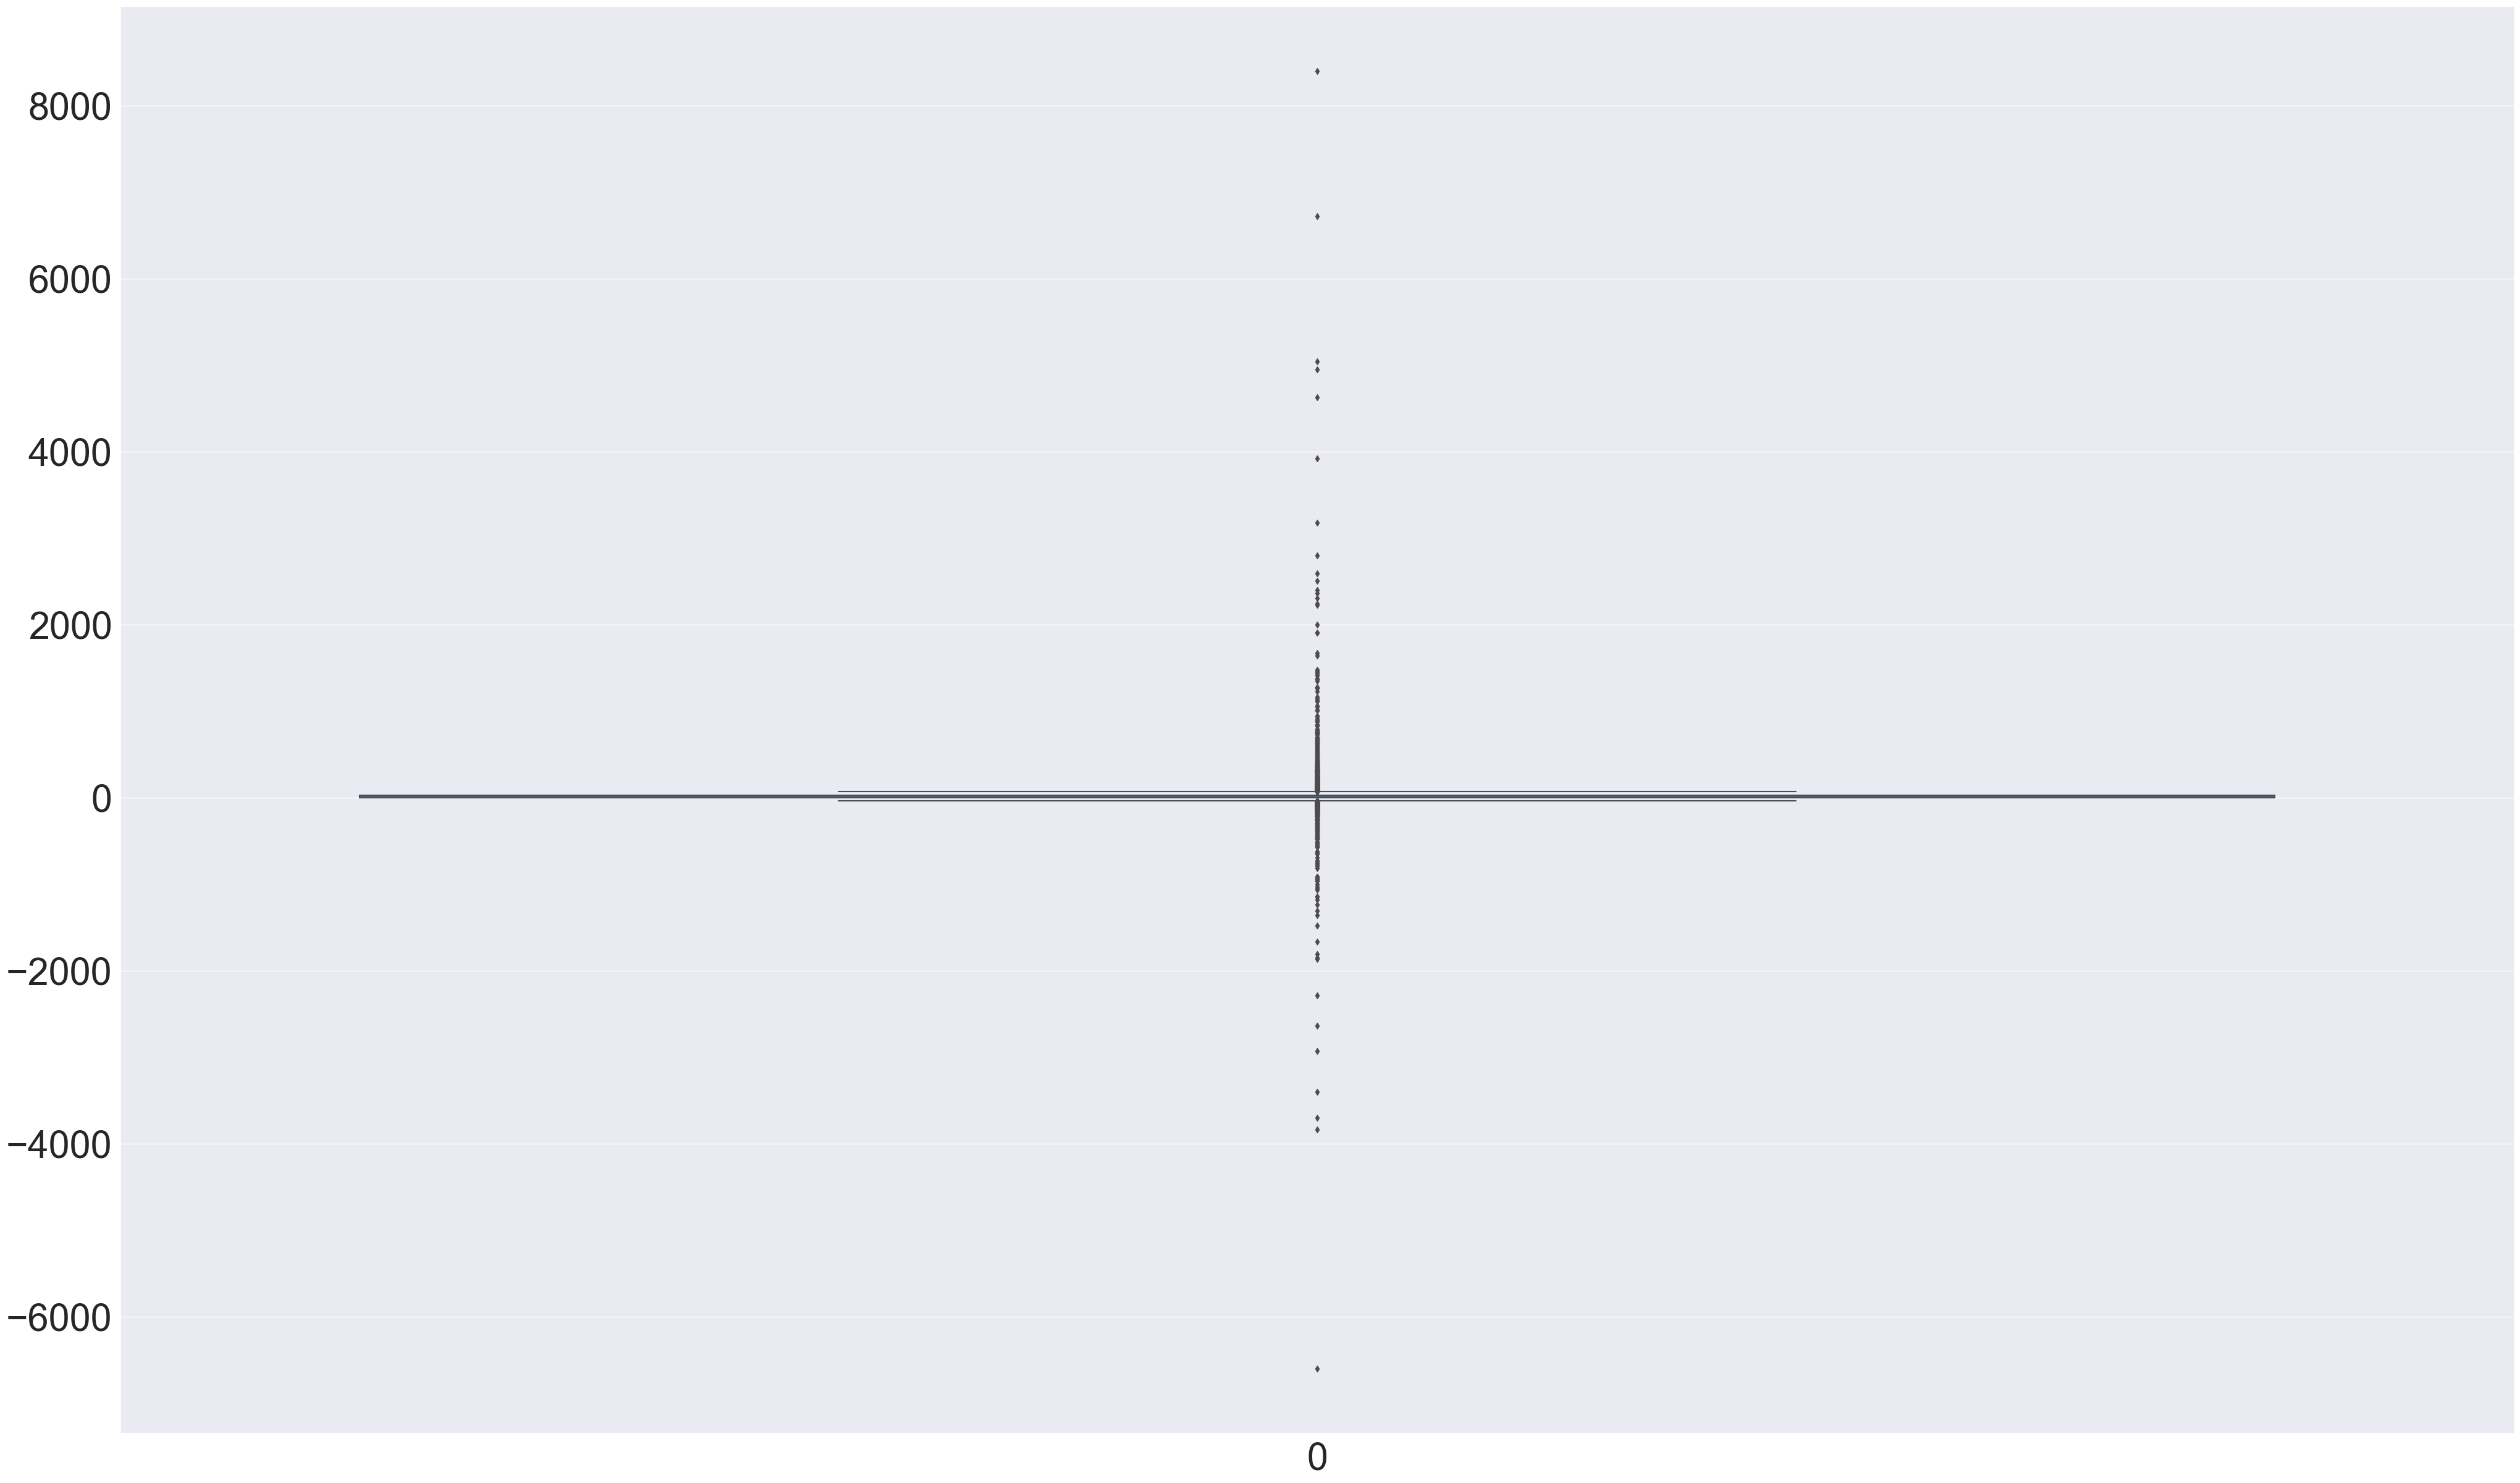

In [64]:
sns.boxplot(new_df['Profit'])       #Checking for outliers using boxplot

In [65]:
new_df.describe()  #Getting statistical info about the data

Sales     Quantity     Discount       Profit  \
count   9993.000000  9993.000000  9993.000000  9993.000000   
mean     229.852846     3.789753     0.156188    28.660971   
std      623.276074     2.225149     0.206457   234.271476   
min        0.444000     1.000000     0.000000 -6599.978000   
25%       17.280000     2.000000     0.000000     1.731000   
50%       54.480000     3.000000     0.200000     8.671000   
75%      209.940000     5.000000     0.200000    29.364000   
max    22638.480000    14.000000     0.800000  8399.976000   

       Diff b/w order and ship date  
count                   9993.000000  
mean                       3.958171  
std                        1.747654  
min                        0.000000  
25%                        3.000000  
50%                        4.000000  
75%                        5.000000  
max                        7.000000

In [66]:
max_threshold = new_df['Profit'].quantile(0.95)         #Calculating the minimum and maximum threshold for profit column
min_threshold = new_df['Profit'].quantile(0.05)         #5%ile and 95%ile

In [67]:
new_df = new_df[(new_df['Profit'] > min_threshold) & (new_df['Profit'] < max_threshold)]        #Removing the rows in which the profit is out of range

In [68]:
new_df.describe()

Sales     Quantity     Discount       Profit  \
count  8992.000000  8992.000000  8992.000000  8992.000000   
mean    128.446728     3.657585     0.144901    19.147666   
std     231.864405     2.156349     0.196165    33.804200   
min       0.444000     1.000000     0.000000   -53.008800   
25%      15.423000     2.000000     0.000000     2.340750   
50%      43.010000     3.000000     0.100000     8.666500   
75%     143.977500     5.000000     0.200000    25.191600   
max    4228.704000    14.000000     0.800000   168.438400   

       Diff b/w order and ship date  
count                   8992.000000  
mean                       3.961299  
std                        1.747061  
min                        0.000000  
25%                        3.000000  
50%                        4.000000  
75%                        5.000000  
max                        7.000000

<Axes: >

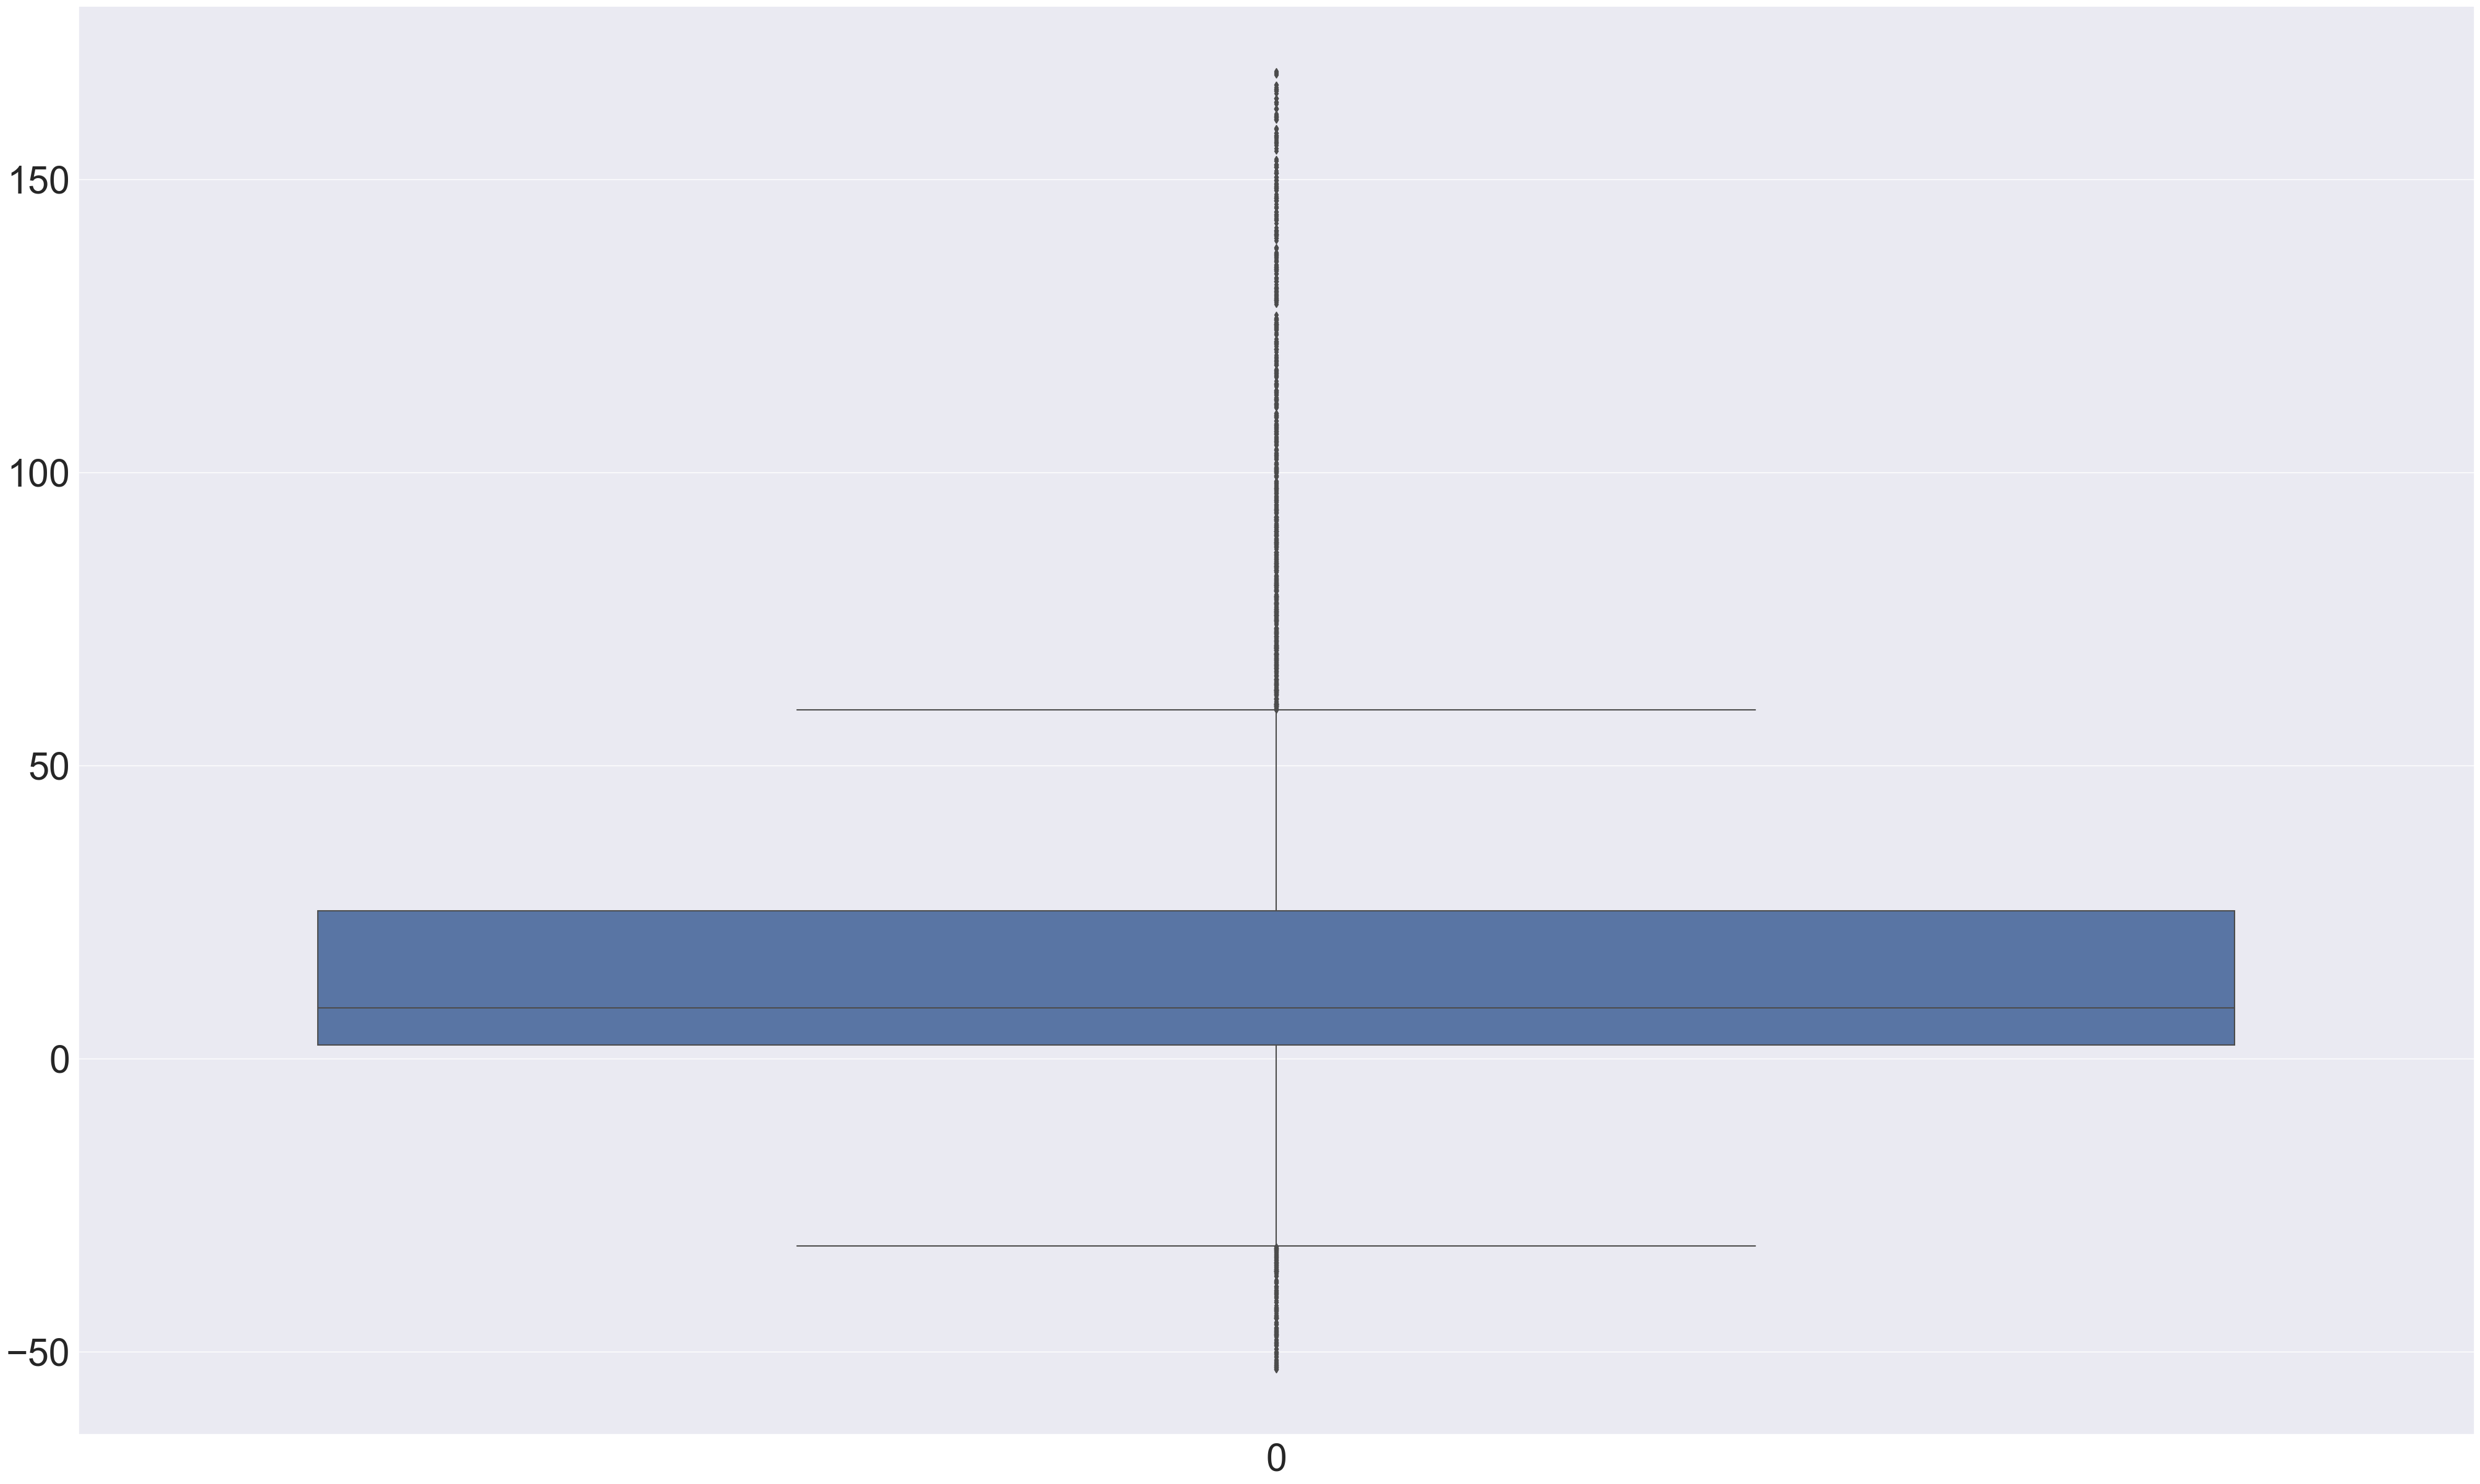

In [69]:
sns.boxplot(new_df['Profit'])      #Outliers have been removed

##Prediction Models

### Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [71]:
new_df.head()

Ship Mode    Segment Sub-Category    Sales  Quantity  Discount  \
0    Second Class   Consumer    Bookcases  261.960         2       0.0   
2    Second Class  Corporate       Labels   14.620         2       0.0   
4  Standard Class   Consumer      Storage   22.368         2       0.2   
5  Standard Class   Consumer  Furnishings   48.860         7       0.0   
6  Standard Class   Consumer          Art    7.280         4       0.0   

    Profit  Diff b/w order and ship date  
0  41.9136                             3  
2   6.8714                             4  
4   2.5164                             7  
5  14.1694                             5  
6   1.9656                             5

In [72]:
dataset = new_df
y=dataset.iloc[:,-1:].values
x=dataset.iloc[:,:-1].values     #Splitting the data into dependent and independent
                                 #variables for x and y respectively

In [73]:
x  #independent variables

array([['Second Class', 'Consumer', 'Bookcases', ..., 2, 0.0, 41.9136],
       ['Second Class', 'Corporate', 'Labels', ..., 2, 0.0, 6.8714],
       ['Standard Class', 'Consumer', 'Storage', ..., 2, 0.2, 2.5164],
       ...,
       ['Standard Class', 'Consumer', 'Phones', ..., 2, 0.2, 19.3932],
       ['Standard Class', 'Consumer', 'Paper', ..., 4, 0.0, 13.32],
       ['Second Class', 'Consumer', 'Appliances', ..., 2, 0.0, 72.948]],
      dtype=object)

In [74]:
y  #dependent variables

array([[3],
       [4],
       [7],
       ...,
       [5],
       [5],
       [5]], dtype=int64)

In [75]:
def encode(arr):
    '''Applying labelencoding to the columns which have categorical values'''
    for p in arr:
        from sklearn.preprocessing import LabelEncoder,OneHotEncoder
        labelencoder_x=LabelEncoder()
        x[:,p]=labelencoder_x.fit_transform(x[:,p])
arr=[0,1,2]
encode(arr)

In [76]:
g=pd.DataFrame(x)     #Changing labelencoded numpyarray into dataframe

In [77]:
g

0  1   2        3  4    5        6
0     2  0   4   261.96  2  0.0  41.9136
1     2  1  10    14.62  2  0.0   6.8714
2     3  0  14   22.368  2  0.2   2.5164
3     3  0   9    48.86  7  0.0  14.1694
4     3  0   2     7.28  4  0.0   1.9656
...  .. ..  ..      ... ..  ...      ...
8987  2  0   9   25.248  3  0.2   4.1028
8988  3  0   9    91.96  2  0.0  15.6332
8989  3  0  13  258.576  2  0.2  19.3932
8990  3  0  12     29.6  4  0.0    13.32
8991  2  0   1   243.16  2  0.0   72.948

[8992 rows x 7 columns]

#### Applying OneHotEncoding to labelencoded values

In [78]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],     remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x))

In [79]:
x=x[:,1:]
x

array([[0.0, 1.0, 0.0, ..., 2, 0.0, 41.9136],
       [0.0, 1.0, 0.0, ..., 2, 0.0, 6.8714],
       [0.0, 0.0, 1.0, ..., 2, 0.2, 2.5164],
       ...,
       [0.0, 0.0, 1.0, ..., 2, 0.2, 19.3932],
       [0.0, 0.0, 1.0, ..., 4, 0.0, 13.32],
       [0.0, 1.0, 0.0, ..., 2, 0.0, 72.948]], dtype=object)

In [80]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3])],     remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x))

In [81]:
x=x[:,1:]
x

array([[0.0, 0.0, 0.0, ..., 2, 0.0, 41.9136],
       [1.0, 0.0, 0.0, ..., 2, 0.0, 6.8714],
       [0.0, 0.0, 0.0, ..., 2, 0.2, 2.5164],
       ...,
       [0.0, 0.0, 0.0, ..., 2, 0.2, 19.3932],
       [0.0, 0.0, 0.0, ..., 4, 0.0, 13.32],
       [0.0, 0.0, 0.0, ..., 2, 0.0, 72.948]], dtype=object)

In [82]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [5])],     remainder='passthrough')
x=np.array(columnTransformer.fit_transform(x))

In [83]:
x=x[:,1:]
x

array([[0.0, 0.0, 0.0, ..., 2, 0.0, 41.9136],
       [0.0, 0.0, 0.0, ..., 2, 0.0, 6.8714],
       [0.0, 0.0, 0.0, ..., 2, 0.2, 2.5164],
       ...,
       [0.0, 0.0, 0.0, ..., 2, 0.2, 19.3932],
       [0.0, 0.0, 0.0, ..., 4, 0.0, 13.32],
       [1.0, 0.0, 0.0, ..., 2, 0.0, 72.948]], dtype=object)

In [84]:
g=pd.DataFrame(x)
g                     #Displaying dataframe after label and onehot encoding

0    1    2    3    4    5    6    7    8    9   ...   15   16   17  \
0     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8987  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
8988  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
8989  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8990  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
8991  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       18   19   20       21 22   23       24  
0     0.0  1.0  0.0   261.96  2  0.0  41.9136  
1     0.0  1.0  0.0    14.62  2  0.0   6.8714  
2     0.0  0.0  1.0   22.368  2  0.2   2.5164  
3     0.0  0.0  1.0    48.86  7  0.0  14.1694  
4     0.0  0.0  1.0     7.28  4  0.0   1.9656  
...   ...  ...  ...      ... ..  ...      ...  
8987  0.0  1.0  0.0   25.248  3  0.2   4.1028  
8988  0.0  0.0  1.0    91.96  2  0.0  15.6332  
8989  0.0  0.0  1.0  258.576  2  0.2  19.3932  
8990  0.0  0.0  1.0     29.6  4  0.0    13.32  
8991  0.0  1.0  0.0   243.16  2  0.0   72.948  

[8992 rows x 25 columns]

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)    #splitting the data into training and testing data 10% for testing and 90% for training

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)      #Values which have been predicted by the model

In [86]:
y_pred

array([[ 4.95807942e+00],
       [ 3.14970121e+00],
       [ 5.07956363e+00],
       [ 3.21071472e+00],
       [ 2.22328038e+00],
       [ 3.25704639e+00],
       [ 3.22550834e+00],
       [ 5.11587780e+00],
       [ 5.06774463e+00],
       [ 5.04250628e+00],
       [ 4.91803286e+00],
       [ 3.13709833e+00],
       [ 4.99236517e+00],
       [ 5.01704466e+00],
       [ 4.99382546e+00],
       [ 6.98582455e-02],
       [ 5.01522379e+00],
       [ 5.08032421e+00],
       [ 5.05290291e+00],
       [ 5.01996570e+00],
       [ 5.00606672e+00],
       [ 5.00755599e+00],
       [ 5.07939377e+00],
       [ 4.98945693e+00],
       [ 5.06280281e+00],
       [ 4.92622787e+00],
       [ 5.01509297e+00],
       [ 3.22549134e+00],
       [ 6.05788090e-02],
       [ 2.26221387e+00],
       [ 5.05144459e+00],
       [ 4.97953110e+00],
       [ 3.26592915e+00],
       [ 5.00486019e+00],
       [ 5.07269035e+00],
       [ 2.15395923e+00],
       [ 5.02359736e+00],
       [ 3.22357545e+00],
       [ 2.2

In [87]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)    #As the data is non-linear the error is very high, so we go for classification model

1.0287815027371554

### KNN Algorithm

In [88]:
new1_df = df.copy(deep=True)

In [89]:
new1_df.drop(['Order ID', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Product Name', 'Order Month', 'Order Year', 'Order Day of Week', 'Ship Month', 'Ship Year', 'Ship Day of Week'], axis=1,inplace=True)

In [90]:
new1_df

Ship Mode    Segment Sub-Category     Sales  Quantity  Discount  \
0       Second Class   Consumer    Bookcases  261.9600         2      0.00   
1       Second Class   Consumer       Chairs  731.9400         3      0.00   
2       Second Class  Corporate       Labels   14.6200         2      0.00   
3     Standard Class   Consumer       Tables  957.5775         5      0.45   
4     Standard Class   Consumer      Storage   22.3680         2      0.20   
...              ...        ...          ...       ...       ...       ...   
9989    Second Class   Consumer  Furnishings   25.2480         3      0.20   
9990  Standard Class   Consumer  Furnishings   91.9600         2      0.00   
9991  Standard Class   Consumer       Phones  258.5760         2      0.20   
9992  Standard Class   Consumer        Paper   29.6000         4      0.00   
9993    Second Class   Consumer   Appliances  243.1600         2      0.00   

        Profit  Diff b/w order and ship date  
0      41.9136                             3  
1     219.5820                             3  
2       6.8714                             4  
3    -383.0310                             7  
4       2.5164                             7  
...        ...                           ...  
9989    4.1028                             2  
9990   15.6332                             5  
9991   19.3932                             5  
9992   13.3200                             5  
9993   72.9480                             5  

[9993 rows x 8 columns]

In [91]:
y=new1_df.iloc[:,-1:].values              #dependent variable = 'Profit'
x=new1_df.iloc[:,3:-1].values             #independent variable = 'Sales','Quantity','Discount' (as they affect profit the most)

In [92]:
y=np.where(y > 0, 1, np.where(y< 0, -1,0))       #If profit>0 change the value to 1  (profit)
p=pd.DataFrame(y)                                #If profit<0 change the value to -1  (loss)
p[0].value_counts()                              #If profit=0 change the value to 0   (neutral)

1    9474
0     519
Name: 0, dtype: int64

In [93]:
p=pd.DataFrame(x)
p

0    1     2         3
0     261.9600  2.0  0.00   41.9136
1     731.9400  3.0  0.00  219.5820
2      14.6200  2.0  0.00    6.8714
3     957.5775  5.0  0.45 -383.0310
4      22.3680  2.0  0.20    2.5164
...        ...  ...   ...       ...
9988   25.2480  3.0  0.20    4.1028
9989   91.9600  2.0  0.00   15.6332
9990  258.5760  2.0  0.20   19.3932
9991   29.6000  4.0  0.00   13.3200
9992  243.1600  2.0  0.00   72.9480

[9993 rows x 4 columns]

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [95]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()                               #applying feature scaling on independent variables
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

In [96]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(x_train,y_train.ravel())

KNeighborsClassifier()

In [97]:
y_pred=classifier.predict(x_test)           #predicted class by the model


In [98]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)                #confusion matrix to check accuracy of the model

In [100]:
cm                                                #confusion matrix

array([[   1,  121],
       [   5, 2372]], dtype=int64)

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.17      0.01      0.02       122
           1       0.95      1.00      0.97      2377

    accuracy                           0.95      2499
   macro avg       0.56      0.50      0.49      2499
weighted avg       0.91      0.95      0.93      2499



In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9495798319327731

KNN gives an accuracy of 93.27%

### Logistic Regression

In [103]:
lr_df = new_df
y=dataset.iloc[:,-1:].values
x=dataset.iloc[:,3:5].values

In [104]:
y=np.where(y > 0, 1, np.where(y< 0, 0,0))
p=pd.DataFrame(y)
p[0].value_counts()

1    8528
0     464
Name: 0, dtype: int64

In [105]:
p=pd.DataFrame(x)
p

0    1
0     261.960  2.0
1      14.620  2.0
2      22.368  2.0
3      48.860  7.0
4       7.280  4.0
...       ...  ...
8987   25.248  3.0
8988   91.960  2.0
8989  258.576  2.0
8990   29.600  4.0
8991  243.160  2.0

[8992 rows x 2 columns]

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [107]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)


In [108]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(random_state=0)

In [109]:
y_pred=classifier.predict(x_test)


In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[   0,  105],
       [   0, 2143]], dtype=int64)

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.95      1.00      0.98      2143

    accuracy                           0.95      2248
   macro avg       0.48      0.50      0.49      2248
weighted avg       0.91      0.95      0.93      2248



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9532918149466192

Logistic Regression gives an accuracy of 84.69%

### Decision tree classification

In [113]:
new1_df = df.copy(deep=True)

In [114]:
new1_df.drop(['Order ID', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Product Name', 'Order Month', 'Order Year', 'Order Day of Week', 'Ship Month', 'Ship Year', 'Ship Day of Week'], axis=1,inplace=True)

In [115]:
new1_df

Ship Mode    Segment Sub-Category     Sales  Quantity  Discount  \
0       Second Class   Consumer    Bookcases  261.9600         2      0.00   
1       Second Class   Consumer       Chairs  731.9400         3      0.00   
2       Second Class  Corporate       Labels   14.6200         2      0.00   
3     Standard Class   Consumer       Tables  957.5775         5      0.45   
4     Standard Class   Consumer      Storage   22.3680         2      0.20   
...              ...        ...          ...       ...       ...       ...   
9989    Second Class   Consumer  Furnishings   25.2480         3      0.20   
9990  Standard Class   Consumer  Furnishings   91.9600         2      0.00   
9991  Standard Class   Consumer       Phones  258.5760         2      0.20   
9992  Standard Class   Consumer        Paper   29.6000         4      0.00   
9993    Second Class   Consumer   Appliances  243.1600         2      0.00   

        Profit  Diff b/w order and ship date  
0      41.9136                             3  
1     219.5820                             3  
2       6.8714                             4  
3    -383.0310                             7  
4       2.5164                             7  
...        ...                           ...  
9989    4.1028                             2  
9990   15.6332                             5  
9991   19.3932                             5  
9992   13.3200                             5  
9993   72.9480                             5  

[9993 rows x 8 columns]

In [116]:
y=new1_df.iloc[:,-1:].values
x=new1_df.iloc[:,3:-1].values

In [117]:
y=np.where(y > 0, 1, np.where(y< 0, -1,0))
p=pd.DataFrame(y)
p[0].value_counts()

1    9474
0     519
Name: 0, dtype: int64

In [118]:
p=pd.DataFrame(x)
p

0    1     2         3
0     261.9600  2.0  0.00   41.9136
1     731.9400  3.0  0.00  219.5820
2      14.6200  2.0  0.00    6.8714
3     957.5775  5.0  0.45 -383.0310
4      22.3680  2.0  0.20    2.5164
...        ...  ...   ...       ...
9988   25.2480  3.0  0.20    4.1028
9989   91.9600  2.0  0.00   15.6332
9990  258.5760  2.0  0.20   19.3932
9991   29.6000  4.0  0.00   13.3200
9992  243.1600  2.0  0.00   72.9480

[9993 rows x 4 columns]

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [120]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [121]:
y_pred=classifier.predict(x_test)

In [122]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[   9,  113],
       [ 133, 2244]], dtype=int64)

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.06      0.07      0.07       122
           1       0.95      0.94      0.95      2377

    accuracy                           0.90      2499
   macro avg       0.51      0.51      0.51      2499
weighted avg       0.91      0.90      0.91      2499



In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9015606242496998

Decision Tree gives an acuuracy of 92.63%

### Random forest classification

In [126]:
new1_df = df.copy(deep=True)

In [127]:
new1_df.drop(['Order ID', 'Customer ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Product Name', 'Order Month', 'Order Year', 'Order Day of Week', 'Ship Month', 'Ship Year', 'Ship Day of Week'], axis=1,inplace=True)

In [128]:
new_df

Ship Mode    Segment Sub-Category    Sales  Quantity  Discount  \
0       Second Class   Consumer    Bookcases  261.960         2       0.0   
2       Second Class  Corporate       Labels   14.620         2       0.0   
4     Standard Class   Consumer      Storage   22.368         2       0.2   
5     Standard Class   Consumer  Furnishings   48.860         7       0.0   
6     Standard Class   Consumer          Art    7.280         4       0.0   
...              ...        ...          ...      ...       ...       ...   
9989    Second Class   Consumer  Furnishings   25.248         3       0.2   
9990  Standard Class   Consumer  Furnishings   91.960         2       0.0   
9991  Standard Class   Consumer       Phones  258.576         2       0.2   
9992  Standard Class   Consumer        Paper   29.600         4       0.0   
9993    Second Class   Consumer   Appliances  243.160         2       0.0   

       Profit  Diff b/w order and ship date  
0     41.9136                             3  
2      6.8714                             4  
4      2.5164                             7  
5     14.1694                             5  
6      1.9656                             5  
...       ...                           ...  
9989   4.1028                             2  
9990  15.6332                             5  
9991  19.3932                             5  
9992  13.3200                             5  
9993  72.9480                             5  

[8992 rows x 8 columns]

In [129]:
y=new1_df.iloc[:,-1:].values
x=new1_df.iloc[:,3:-1].values

In [130]:
y=np.where(y > 0, 1, np.where(y< 0, -1,0))
p=pd.DataFrame(y)
p[0].value_counts()

1    9474
0     519
Name: 0, dtype: int64

In [131]:
p=pd.DataFrame(x)
p

0    1     2         3
0     261.9600  2.0  0.00   41.9136
1     731.9400  3.0  0.00  219.5820
2      14.6200  2.0  0.00    6.8714
3     957.5775  5.0  0.45 -383.0310
4      22.3680  2.0  0.20    2.5164
...        ...  ...   ...       ...
9988   25.2480  3.0  0.20    4.1028
9989   91.9600  2.0  0.00   15.6332
9990  258.5760  2.0  0.20   19.3932
9991   29.6000  4.0  0.00   13.3200
9992  243.1600  2.0  0.00   72.9480

[9993 rows x 4 columns]

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [133]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

C:\Users\Asus\AppData\Local\Temp\ipykernel_13664\415059052.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [134]:
y_pred=classifier.predict(x_test)

In [135]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[   4,  118],
       [  35, 2342]], dtype=int64)

In [137]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.10      0.03      0.05       122
           1       0.95      0.99      0.97      2377

    accuracy                           0.94      2499
   macro avg       0.53      0.51      0.51      2499
weighted avg       0.91      0.94      0.92      2499



In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9387755102040817

Random Forest gives an accuracy of 92.75%.

### Accuracies of all models

*   K nearest neighbours     93.27%
*   Logistic regression      84.69%
*   Decision tree            92.63%
*   Random forest            92.75%